<a href="https://colab.research.google.com/github/wal-03/Pedas-competiton-2024/blob/main/Boolean_Hooligan_Lomba_Data_Science_Pedas_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengimport Module

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# import pmdarima as pm

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

from datetime import datetime

"Done"

'Done'

# Load Data

In [ ]:
url_1 = 'https://raw.githubusercontent.com/wal-03/Pedas-competiton-2024/refs/heads/main/dataTransaksi_PeDaS_2024_Train.csv'
url_2 = 'https://raw.githubusercontent.com/wal-03/Pedas-competiton-2024/refs/heads/main/dataTransaksi_PeDaS_2024_Test_Peserta.csv'

# Membaca data dari file CSV
dfTrain = pd.read_csv(url_1)

# Menampilkan beberapa baris pertama dari DataFrame
dfTrain.head()

trx_code  trx_id  rek_code   rek               creationdate  type     amount     balance
0     50261  100085      1922  2526  2022-02-07 16:41:44+07:00     5  -100000.0       37.14
1     50260  100001      1922  2526  2022-02-07 16:02:58+07:00     5  -100000.0   100037.14
2    154447  775749      2346  9437  2022-03-07 08:53:06+07:00     5 -1000000.0  1679999.69
3     50285  564858      2346  9437  2022-03-03 18:41:16+07:00     1   100000.0  2609999.69
4    154240  565293      2212  5908  2022-03-03 20:22:31+07:00     1   100000.0  1200526.93

In [ ]:
# Membaca data dari file CSV
dfTest = pd.read_csv(url_2)

# Menampilkan beberapa baris pertama dari DataFrame
dfTest.head()

trx_code     trx_id  rek_code   rek               creationdate  type  balance
0    233822  371848437      1922  2526  2024-10-21 20:02:14+07:00   NaN      NaN
1    281563  370918907      2346  9437  2024-10-17 08:23:41+07:00   NaN      NaN
2    310541  370287760      2212  5908  2024-10-14 07:44:47+07:00   NaN      NaN
3     37018  370872355      3799  7665  2024-10-16 23:04:24+07:00   NaN      NaN
4    142422  362772092      7868   825  2024-10-01 00:13:21+07:00   NaN      NaN

# EDA dan Preprocessing

In [ ]:
#melakukan perubahan tipe data
dfTest['creationdate'] = pd.to_datetime(dfTest['creationdate'])

## Memeriksa Tipe Data

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype                    
---  ------        --------------  -----                    
 0   trx_code      35 non-null     int64                    
 1   trx_id        35 non-null     int64                    
 2   rek_code      35 non-null     int64                    
 3   rek           35 non-null     int64                    
 4   creationdate  35 non-null     datetime64[ns, UTC+07:00]
 5   type          0 non-null      float64                  
 6   balance       0 non-null      float64                  
dtypes: datetime64[ns, UTC+07:00](1), float64(2), int64(4)
memory usage: 2.0 KB


## Cek Duplikat Data

In [ ]:
print(dfTrain.shape)
dfTrain.duplicated().sum()


print(dfTest.shape)
dfTest.duplicated().sum()

(16615, 8)
(35, 7)


0

Tampa Terlihat tidak ada duplikat data

## Memeriksa Missing Value

In [ ]:
print(dfTrain.isnull().sum())
print(dfTest.isnull().sum())

trx_code          0
trx_id            0
rek_code          0
rek               0
creationdate      0
type              0
amount          586
balance           0
dtype: int64
trx_code         0
trx_id           0
rek_code         0
rek              0
creationdate     0
type            35
balance         35
dtype: int64


## Statistika Deskriptif

In [ ]:
dfTest.describe(include='all')

trx_code        trx_id      rek_code           rek                         creationdate  type  balance
count      35.000000  3.500000e+01     35.000000     35.000000                                   35   0.0      0.0
mean   319195.171429  3.690526e+08   8300.714286   8164.114286  2024-10-14 01:08:19.114285824+07:00   NaN      NaN
min     34251.000000  3.122212e+08    515.000000    541.000000            2024-06-06 18:51:53+07:00   NaN      NaN
25%    168049.500000  3.705930e+08   2564.000000   6068.000000     2024-10-15 17:10:25.500000+07:00   NaN      NaN
50%    315819.000000  3.715286e+08   6583.000000   7977.000000            2024-10-20 07:09:48+07:00   NaN      NaN
75%    505913.000000  3.717112e+08  13904.000000  11177.500000            2024-10-21 07:08:36+07:00   NaN      NaN
max    577720.000000  3.718806e+08  20365.000000  15923.000000            2024-10-21 23:47:37+07:00   NaN      NaN
std    178631.416890  1.012517e+07   6473.903598   4484.041151                                  NaN   NaN      NaN

## Mengecek Unique

In [ ]:
# memeriksa entri data di tiap variabel, apakah ada noise
for kolom in dfTest.columns:
    print(f'kolom: {kolom}\ntotal unique: {dfTest[kolom].nunique()}\nunique: {dfTest[kolom].unique()}\n')

kolom: trx_code
total unique: 35
unique: [233822 281563 310541  37018 142422 128215 576302 316534 435860 355943
 505898 460774  34251 508484 505934 507070 109389  37163 233807 525412
 440300 460781 193677 577720 505928 331565 315819 284605 109370 525511
  39817 304728  39671 505930 290007]

kolom: trx_id
total unique: 35
unique: [371848437 370918907 370287760 370872355 362772092 312221200 362740207
 371805906 370502689 367221236 371528573 371710495 370484455 371710644
 371734141 371504187 371710529 371711721 371711224 371365612 371710280
 371711703 371865019 370985378 371710582 371711478 371710713 371435417
 371607910 371880587 371449898 370592988 370592943 371711098 369802962]

kolom: rek_code
total unique: 35
unique: [ 1922  2346  2212  3799  7868 11465  2604 14602  5614 10641  2623  1035
  3533 13507  2979 20365  6719   515  6583   893  4090 12429 15927 19084
 19108 15382  9718  3821  2524 14301  1688 19034  2297 11213 18084]

kolom: rek
total unique: 35
unique: [ 2526  9437  5908  

## Membuat Plot Visualisasi

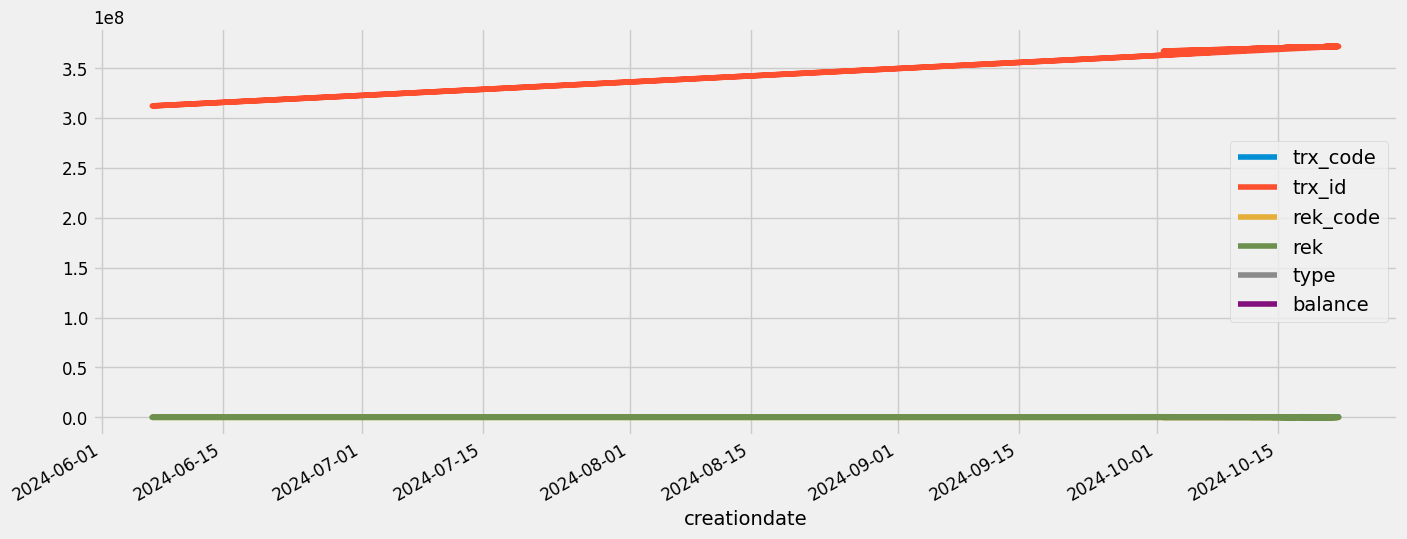

In [ ]:
dfTest['creationdate'] = pd.to_datetime(dfTest['creationdate'], format='%m/%d/%Y')
y = dfTest.set_index('creationdate')
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
rek_code_order = {code: i for i, code in enumerate(dfTest['rek_code'].unique())}

dfTrain['rek_code_order'] = dfTrain['rek_code'].map(rek_code_order)
dfTrain_sorted = dfTrain.sort_values(by=['rek_code_order', 'rek_code'])
dfTrain_sorted = dfTrain_sorted.drop(columns=['rek_code_order'])

dfTrain_sorted

trx_code     trx_id  rek_code   rek               creationdate  type      amount     balance
0         50261     100085      1922  2526  2022-02-07 16:41:44+07:00     5  -100000.00       37.14
1         50260     100001      1922  2526  2022-02-07 16:02:58+07:00     5  -100000.00   100037.14
16       148934    3358183      1922  2526  2022-04-23 06:48:54+07:00     5 -3000000.00   502718.01
17       119310    3366559      1922  2526  2022-04-23 19:49:09+07:00     1  3000000.00  3502718.01
28       121775    4935567      1922  2526  2022-05-24 21:44:55+07:00     1   500000.00  3509831.00
...         ...        ...       ...   ...                        ...   ...         ...         ...
15965    161475  362732713     18084  6376  2024-10-01 00:11:13+07:00     2    11133.82  3312227.94
16012    513587  367833554     18084  6376  2024-10-03 19:34:28+07:00     5  -300000.00  3001001.18
16152    435413  367933403     18084  6376  2024-10-04 08:45:13+07:00     5 -2000000.00  1001001.18
16314    435620  369153261     18084  6376  2024-10-09 09:45:47+07:00     5  -900000.00     1001.18
16359    235488  369338723     18084  6376  2024-10-09 23:22:07+07:00     1   300000.00   301001.18

[16615 rows x 8 columns]

In [ ]:
# Distribusi kolom amount dan balance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dfTrain_sorted['amount'], kde=True)
plt.title('Distribusi Amount')

plt.subplot(1, 2, 2)
sns.histplot(dfTrain_sorted['balance'], kde=True)
plt.title('Distribusi Balance')
plt.show()

Analisis Transaksi untuk Rekening: 1922
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     349.000000  3.490000e+02     349.0   349.0  349.000000  3.170000e+02  3.490000e+02
mean   249249.297994  1.685310e+08    1922.0  2526.0    3.977077  3.486005e+03  2.984797e+06
std    180313.747058  1.174490e+08       0.0     0.0    1.905691  1.120941e+06  1.778435e+06
min        47.000000  3.943100e+04    1922.0  2526.0    1.000000 -4.000000e+06  3.714000e+01
25%    116750.000000  5.487301e+07    1922.0  2526.0    2.000000 -3.000000e+05  1.779695e+06
50%    209391.000000  1.702069e+08    1922.0  2526.0    5.000000 -1.000000e+05  2.783947e+06
75%    344986.000000  2.676488e+08    1922.0  2526.0    5.000000  1.737775e+04  4.091341e+06
max    652385.000000  3.718180e+08    1922.0  2526.0    7.000000  5.000000e+06  7.495078e+06


--------------------------------------------------
Analisis Transaksi untuk Rekening: 2346
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     421.000000  4.210000e+02     421.0   421.0  421.000000  3.890000e+02  4.210000e+02
mean   275374.672209  1.805641e+08    2346.0  9437.0    3.838480  5.144522e+03  1.248984e+06
std    205570.126247  1.357053e+08       0.0     0.0    1.945089  7.295485e+05  1.204484e+06
min      6077.000000  3.492500e+04    2346.0  9437.0    1.000000 -2.295000e+06  0.000000e+00
25%    112213.000000  1.706137e+07    2346.0  9437.0    1.000000 -2.500000e+05  2.519296e+05
50%    216074.000000  2.181496e+08    2346.0  9437.0    5.000000 -5.000000e+03  1.001070e+06
75%    463098.000000  3.008521e+08    2346.0  9437.0    5.000000  9.605430e+03  2.001160e+06
max    651621.000000  3.699972e+08    2346.0  9437.0    7.000000  4.000000e+06  6.001517e+06


--------------------------------------------------
Analisis Transaksi untuk Rekening: 2212
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     351.000000  3.510000e+02     351.0   351.0  351.000000  3.200000e+02  3.510000e+02
mean   327000.299145  2.007541e+08    2212.0  5908.0    4.136752  3.156980e+02  7.878616e+06
std    213491.365782  1.202240e+08       0.0     0.0    1.809053  3.909843e+06  9.655757e+06
min      1381.000000  8.872400e+04    2212.0  5908.0    1.000000 -2.500000e+07  7.093000e+01
25%    121732.000000  6.031446e+07    2212.0  5908.0    2.000000 -2.000000e+05  3.604893e+04
50%    296707.000000  2.564500e+08    2212.0  5908.0    5.000000 -7.000000e+04  3.612294e+06
75%    552885.500000  2.741438e+08    2212.0  5908.0    5.000000  9.542500e+00  1.470051e+07
max    650915.000000  3.701417e+08    2212.0  5908.0    7.000000  2.824857e+07  3.305077e+07


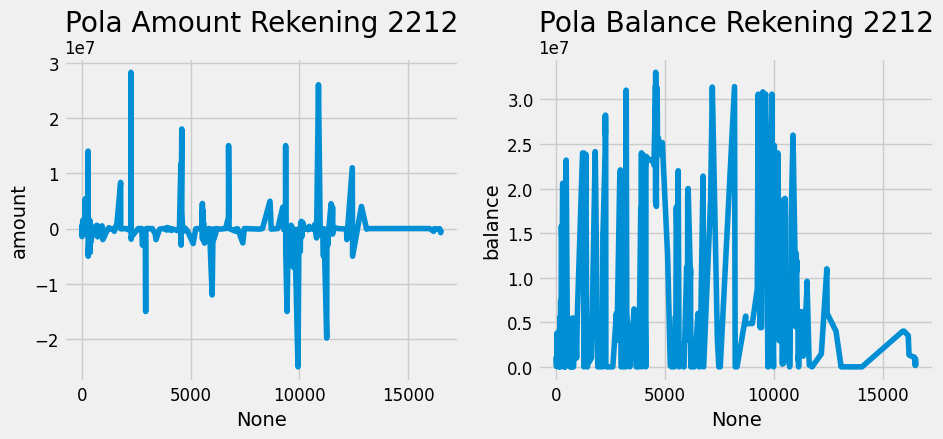

--------------------------------------------------
Analisis Transaksi untuk Rekening: 3799
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     374.000000  3.740000e+02     374.0   374.0  374.000000  3.450000e+02  3.740000e+02
mean   303353.561497  2.071804e+08    3799.0  7665.0    4.179144  4.972684e+02  1.791185e+06
std    198263.384595  1.043057e+08       0.0     0.0    1.762734  7.859030e+05  1.814687e+06
min      1739.000000  2.929879e+06    3799.0  7665.0    1.000000 -5.000000e+06  0.000000e+00
25%    132407.250000  1.655647e+08    3799.0  7665.0    4.000000 -1.050000e+05  5.146452e+05
50%    278772.500000  2.278170e+08    3799.0  7665.0    5.000000 -6.200000e+04  1.399939e+06
75%    471442.500000  2.745292e+08    3799.0  7665.0    5.000000  7.930000e+00  2.361904e+06
max    652287.000000  3.708723e+08    3799.0  7665.0    7.000000  6.000000e+06  8.122346e+06


--------------------------------------------------
Analisis Transaksi untuk Rekening: 7868
            trx_code        trx_id  rek_code    rek       type        amount       balance
count     446.000000  4.460000e+02     446.0  446.0  446.00000  4.230000e+02  4.460000e+02
mean   270324.529148  1.682497e+08    7868.0  825.0    3.90583  1.105960e+01  2.756270e+06
std    200329.874720  8.019889e+07       0.0    0.0    1.86273  2.160320e+06  3.362441e+06
min      3593.000000  3.031437e+07    7868.0  825.0    1.00000 -9.500000e+06  1.000030e+03
25%    101992.250000  8.344057e+07    7868.0  825.0    2.00000 -3.389000e+05  6.684007e+05
50%    216730.500000  1.885806e+08    7868.0  825.0    5.00000 -5.000000e+04  1.823706e+06
75%    401959.000000  2.187139e+08    7868.0  825.0    5.00000  3.569126e+04  3.004878e+06
max    651557.000000  3.627721e+08    7868.0  825.0    7.00000  1.255001e+07  1.500179e+07


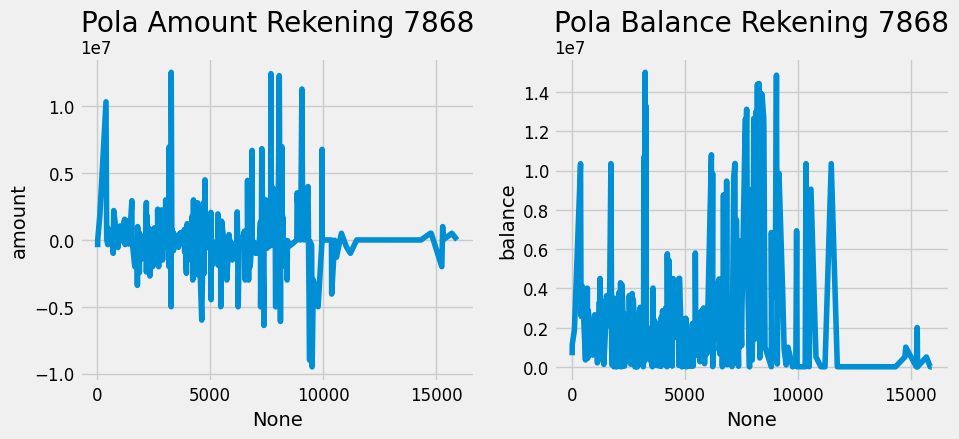

--------------------------------------------------
Analisis Transaksi untuk Rekening: 11465
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     457.000000  4.570000e+02     457.0   457.0  457.000000  4.450000e+02  4.570000e+02
mean   345469.319475  2.419097e+08   11465.0  7639.0    4.490153  1.304438e+02  1.303738e+07
std    205887.552984  3.817123e+07       0.0     0.0    1.400349  1.325788e+06  4.765300e+06
min      1183.000000  1.442113e+08   11465.0  7639.0    1.000000 -2.325000e+07  5.804750e+04
25%    178043.000000  2.085647e+08   11465.0  7639.0    5.000000 -1.000000e+05  8.553439e+06
50%    336607.000000  2.387161e+08   11465.0  7639.0    5.000000 -3.000000e+04  1.289092e+07
75%    556730.000000  2.741964e+08   11465.0  7639.0    5.000000 -7.000000e+03  1.506444e+07
max    652129.000000  3.121895e+08   11465.0  7639.0    7.000000  4.800000e+06  2.337805e+07


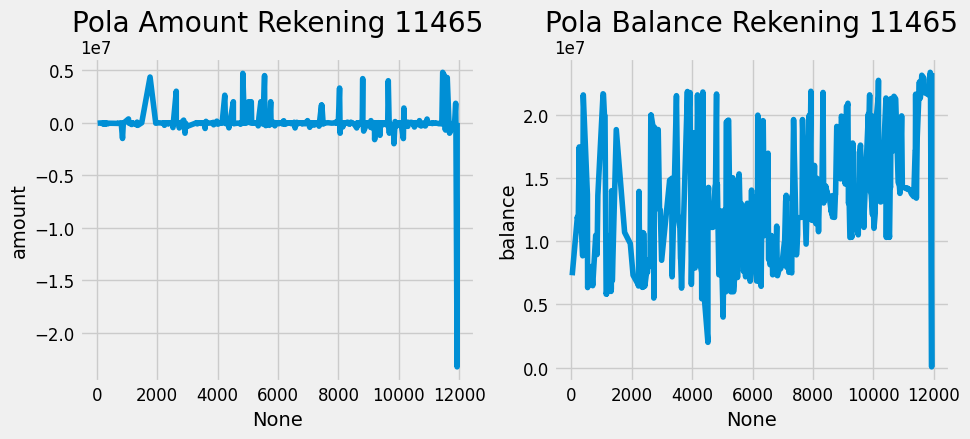

--------------------------------------------------
Analisis Transaksi untuk Rekening: 2604
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     562.000000  5.620000e+02     562.0    562.0  562.000000  5.460000e+02  5.620000e+02
mean   329325.718861  2.426451e+08    2604.0  13082.0    4.453737  1.058932e+01  4.223053e+06
std    214257.335998  5.693382e+07       0.0      0.0    1.433802  7.487508e+05  3.762438e+06
min        24.000000  1.472035e+08    2604.0  13082.0    1.000000 -9.250000e+06  1.298520e+03
25%    137804.000000  1.995997e+08    2604.0  13082.0    5.000000 -1.000000e+05  8.154587e+05
50%    301128.500000  2.278618e+08    2604.0  13082.0    5.000000 -3.000000e+04  2.559500e+06
75%    562862.500000  2.747604e+08    2604.0  13082.0    5.000000 -6.000000e+03  8.329590e+06
max    652188.000000  3.627402e+08    2604.0  13082.0    7.000000  7.011000e+06  1.185342e+07


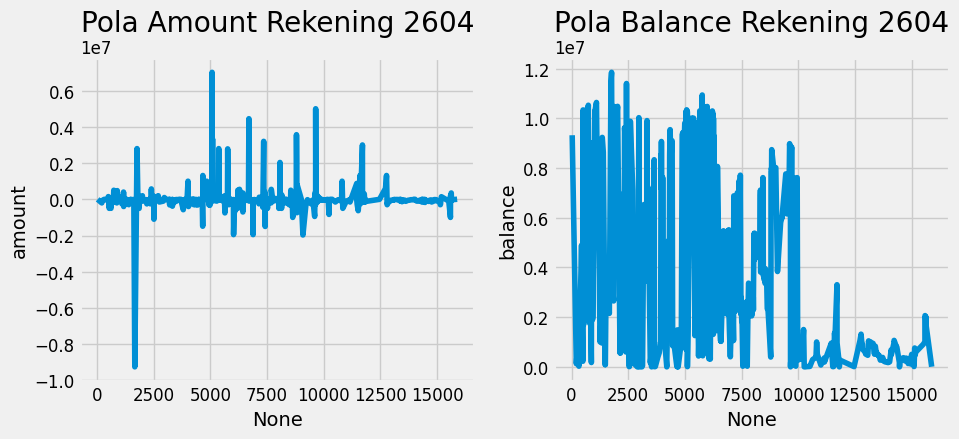

--------------------------------------------------
Analisis Transaksi untuk Rekening: 14602
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     418.000000  4.180000e+02     418.0    418.0  418.000000  4.090000e+02  4.180000e+02
mean   319231.808612  3.254363e+08   14602.0  13945.0    3.236842  2.638600e+04  5.041007e+06
std    179573.167219  2.591732e+07       0.0      0.0    2.015261  1.493251e+06  4.059306e+06
min      3171.000000  2.623621e+08   14602.0  13945.0    1.000000 -1.789298e+07  1.000590e+03
25%    172675.500000  3.015192e+08   14602.0  13945.0    1.000000 -1.340000e+05  2.428251e+06
50%    307738.500000  3.248467e+08   14602.0  13945.0    5.000000 -3.037590e+03  3.837500e+06
75%    496240.000000  3.534202e+08   14602.0  13945.0    5.000000  4.655000e+05  6.549322e+06
max    635677.000000  3.718056e+08   14602.0  13945.0    7.000000  4.800000e+06  1.912298e+07


--------------------------------------------------
Analisis Transaksi untuk Rekening: 5614
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     467.000000  4.670000e+02     467.0   467.0  467.000000  4.380000e+02  4.670000e+02
mean   270125.605996  1.906336e+08    5614.0  1207.0    3.503212  4.780413e+04  1.690632e+07
std    198334.059180  1.124553e+08       0.0     0.0    2.036547  1.780957e+06  5.502142e+06
min      1490.000000  3.395992e+06    5614.0  1207.0    1.000000 -1.900000e+07  2.591292e+06
25%    105342.500000  8.221506e+07    5614.0  1207.0    1.000000 -2.187500e+05  1.363966e+07
50%    217299.000000  2.173754e+08    5614.0  1207.0    5.000000 -1.758988e+04  1.770552e+07
75%    434545.000000  2.807042e+08    5614.0  1207.0    5.000000  2.016875e+05  2.106156e+07
max    650399.000000  3.695594e+08    5614.0  1207.0    7.000000  1.300000e+07  3.028959e+07


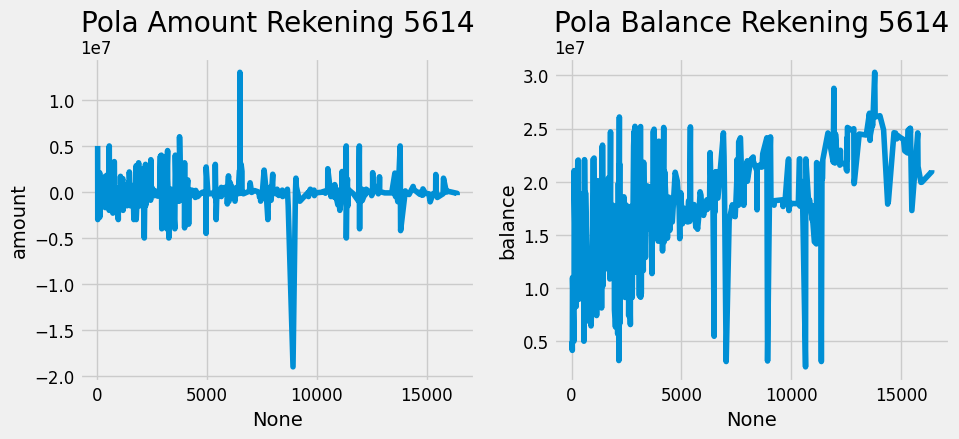

--------------------------------------------------
Analisis Transaksi untuk Rekening: 10641
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     358.000000  3.580000e+02     358.0   358.0  358.000000  3.420000e+02  3.580000e+02
mean   328343.589385  3.057945e+08   10641.0  8538.0    4.396648  1.479645e+03  9.895137e+05
std    193006.412666  4.700747e+07       0.0     0.0    1.524474  6.683455e+05  1.068273e+06
min      2104.000000  1.697637e+08   10641.0  8538.0    1.000000 -3.015000e+06  1.042840e+03
25%    178589.500000  2.874887e+08   10641.0  8538.0    5.000000 -5.000000e+04  3.123917e+05
50%    309318.500000  3.251412e+08   10641.0  8538.0    5.000000 -5.000000e+04  7.500639e+05
75%    509796.750000  3.407967e+08   10641.0  8538.0    5.000000 -1.362950e+03  1.139053e+06
max    649862.000000  3.628175e+08   10641.0  8538.0    7.000000  6.000000e+06  6.002897e+06


--------------------------------------------------
Analisis Transaksi untuk Rekening: 2623
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     511.000000  5.110000e+02     511.0   511.0  511.000000  4.940000e+02  5.110000e+02
mean   344153.045010  2.526356e+08    2623.0  6240.0    1.816047  3.700964e+03  7.512596e+05
std    202275.312182  5.994126e+07       0.0     0.0    1.679582  2.993148e+05  7.055688e+05
min       236.000000  9.896991e+07    2623.0  6240.0    1.000000 -2.150000e+06  1.233920e+03
25%    175637.000000  2.078677e+08    2623.0  6240.0    1.000000  3.866000e+03  2.300338e+05
50%    324146.000000  2.423876e+08    2623.0  6240.0    1.000000  1.001000e+04  5.173656e+05
75%    550153.500000  2.990174e+08    2623.0  6240.0    1.000000  1.001000e+04  1.090823e+06
max    652136.000000  3.713346e+08    2623.0  6240.0    7.000000  2.190000e+06  3.407930e+06


--------------------------------------------------
Analisis Transaksi untuk Rekening: 1035
            trx_code        trx_id  rek_code     rek        type          amount       balance
count     492.000000  4.920000e+02     492.0   492.0  492.000000      477.000000  4.920000e+02
mean   349846.245935  2.708399e+08    1035.0  6672.0    1.508130      104.181069  2.747430e+05
std    209069.190971  5.475871e+07       0.0     0.0    1.400442    65299.673148  2.434732e+05
min       143.000000  1.864508e+08    1035.0  6672.0    1.000000 -1000000.000000  1.307320e+03
25%    169551.750000  2.189012e+08    1035.0  6672.0    1.000000    10272.000000  9.486240e+04
50%    348273.500000  2.677584e+08    1035.0  6672.0    1.000000    10779.000000  1.900455e+05
75%    569760.750000  3.154304e+08    1035.0  6672.0    1.000000    10779.000000  4.079364e+05
max    651540.000000  3.715449e+08    1035.0  6672.0    7.000000   327273.000000  1.062000e+06


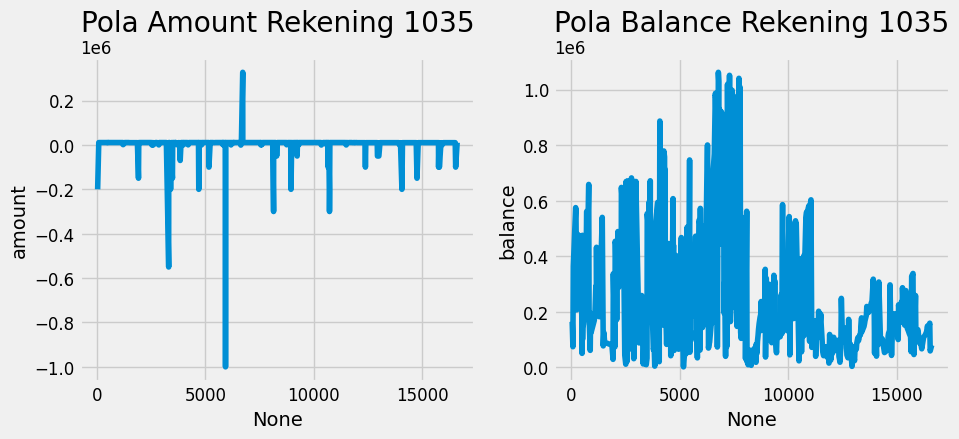

--------------------------------------------------
Analisis Transaksi untuk Rekening: 3533
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     553.000000  5.530000e+02     553.0   553.0  553.000000  5.370000e+02  5.530000e+02
mean   326251.985533  2.574909e+08    3533.0  6228.0    1.309222  1.372731e+03  9.680688e+06
std    198836.001150  6.163044e+07       0.0     0.0    1.154797  8.431738e+05  5.824991e+06
min       121.000000  1.440187e+08    3533.0  6228.0    1.000000 -1.950000e+07  3.909400e+04
25%    172249.000000  2.081560e+08    3533.0  6228.0    1.000000  3.909400e+04  4.563654e+06
50%    307021.000000  2.512993e+08    3533.0  6228.0    1.000000  3.909400e+04  9.590953e+06
75%    517023.000000  3.118817e+08    3533.0  6228.0    1.000000  3.909400e+04  1.472593e+07
max    650036.000000  3.702823e+08    3533.0  6228.0    7.000000  8.898759e+04  1.984622e+07


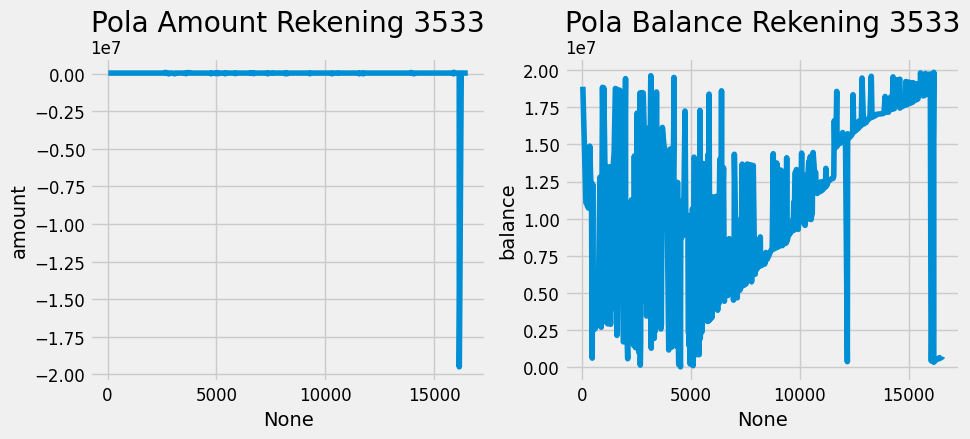

--------------------------------------------------
Analisis Transaksi untuk Rekening: 13507
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     361.000000  3.610000e+02     361.0   361.0  361.000000  3.500000e+02  3.610000e+02
mean   354144.385042  2.939209e+08   13507.0  9175.0    1.437673  2.296076e+03  6.068149e+05
std    191014.925831  4.313447e+07       0.0     0.0    1.321665  1.495953e+05  6.189526e+05
min      3342.000000  2.276703e+08   13507.0  9175.0    1.000000 -2.000000e+06  1.192000e+03
25%    201230.000000  2.607230e+08   13507.0  9175.0    1.000000  2.172900e+04  1.343220e+05
50%    338166.000000  2.897318e+08   13507.0  9175.0    1.000000  2.691600e+04  3.880613e+05
75%    522538.000000  3.284017e+08   13507.0  9175.0    1.000000  2.691600e+04  8.994653e+05
max    652087.000000  3.715279e+08   13507.0  9175.0    7.000000  2.691600e+04  2.496317e+06


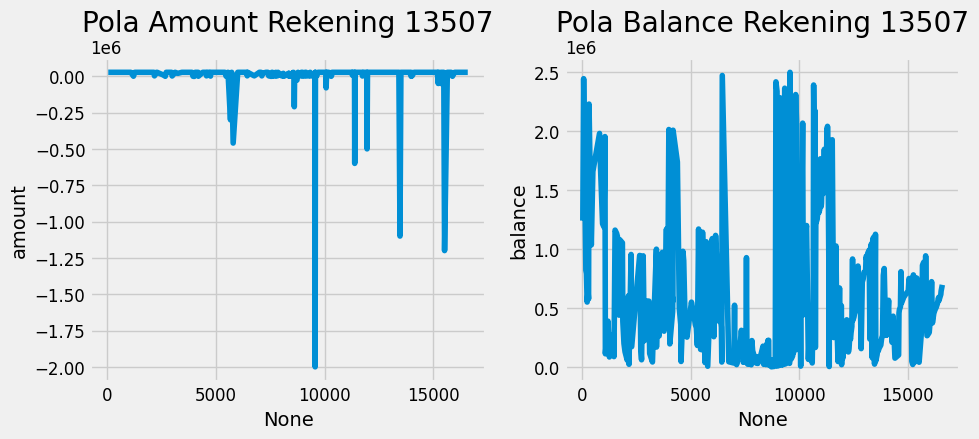

--------------------------------------------------
Analisis Transaksi untuk Rekening: 2979
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     573.000000  5.730000e+02     573.0   573.0  573.000000  5.570000e+02  5.730000e+02
mean   349184.113438  2.846686e+08    2979.0  8562.0    4.209424  3.932345e+03  2.244848e+06
std    191165.742132  5.337668e+07       0.0     0.0    1.650847  6.769877e+05  1.959314e+06
min      1496.000000  1.472784e+08    2979.0  8562.0    1.000000 -9.508000e+06  3.019670e+03
25%    191114.000000  2.422083e+08    2979.0  8562.0    5.000000 -5.000000e+04  7.058130e+05
50%    343673.000000  2.873785e+08    2979.0  8562.0    5.000000 -2.000000e+04  1.790503e+06
75%    516904.000000  3.305347e+08    2979.0  8562.0    5.000000 -1.295650e+03  3.175316e+06
max    650014.000000  3.716021e+08    2979.0  8562.0    7.000000  3.990000e+06  9.951618e+06


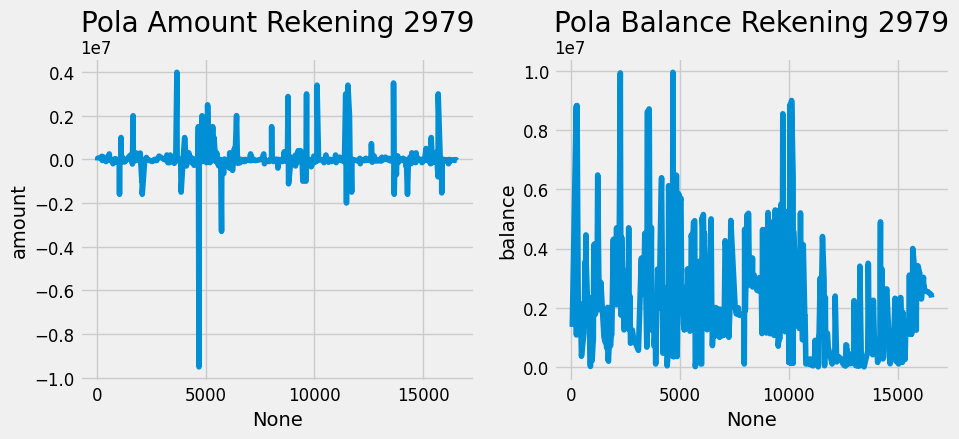

--------------------------------------------------
Analisis Transaksi untuk Rekening: 20365
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     360.000000  3.600000e+02     360.0    360.0  360.000000  3.510000e+02  3.600000e+02
mean   347238.288889  3.098916e+08   20365.0  11071.0    3.119444  2.406393e+01  9.675277e+06
std    192703.366415  2.738192e+07       0.0      0.0    2.030316  2.471145e+06  8.208114e+06
min      1254.000000  2.625016e+08   20365.0  11071.0    1.000000 -1.550250e+07  1.068270e+03
25%    190217.000000  2.882340e+08   20365.0  11071.0    1.000000 -5.000000e+05  3.340041e+06
50%    348823.000000  3.125900e+08   20365.0  11071.0    4.000000 -1.192320e+03  7.409345e+06
75%    548615.500000  3.277488e+08   20365.0  11071.0    5.000000  3.374080e+05  1.582594e+07
max    647748.000000  3.710523e+08   20365.0  11071.0    7.000000  1.480000e+07  3.550069e+07


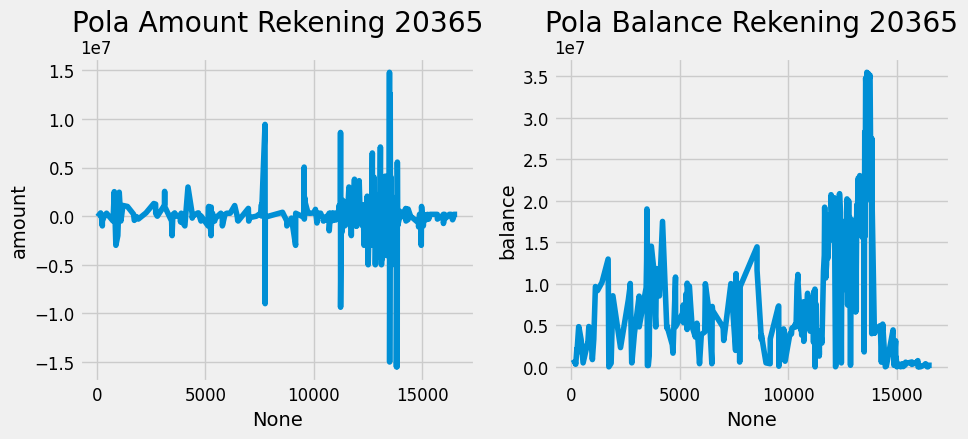

--------------------------------------------------
Analisis Transaksi untuk Rekening: 6719
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     420.000000  4.200000e+02     420.0   420.0  420.000000  4.090000e+02  4.200000e+02
mean   362086.314286  3.030384e+08    6719.0  2109.0    1.509524  1.333707e+04  2.258100e+06
std    194871.200878  4.262452e+07       0.0     0.0    1.392926  5.855573e+05  1.395038e+06
min      1139.000000  2.287017e+08    6719.0  2109.0    1.000000 -4.000000e+06  1.685300e+04
25%    201728.000000  2.637579e+08    6719.0  2109.0    1.000000  1.685300e+04  1.234938e+06
50%    358849.500000  3.022130e+08    6719.0  2109.0    1.000000  1.685300e+04  2.210134e+06
75%    548153.750000  3.414246e+08    6719.0  2109.0    1.000000  1.685300e+04  3.181085e+06
max    651800.000000  3.716182e+08    6719.0  2109.0    7.000000  4.000000e+06  5.619830e+06


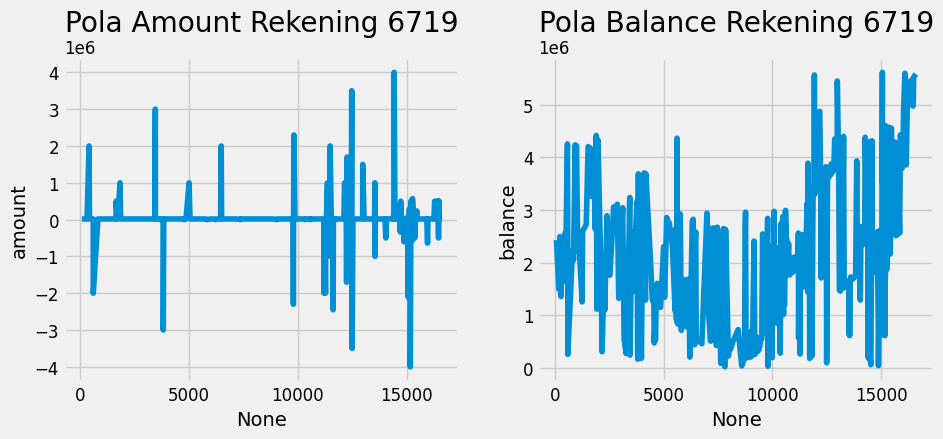

--------------------------------------------------
Analisis Transaksi untuk Rekening: 515
            trx_code        trx_id  rek_code    rek        type        amount       balance
count     471.000000  4.710000e+02     471.0  471.0  471.000000  4.580000e+02  4.710000e+02
mean   355527.174098  2.826074e+08     515.0  541.0    1.360934  1.120329e+04  2.619454e+06
std    199255.482273  4.872039e+07       0.0    0.0    1.217463  5.008529e+05  1.471347e+06
min      1324.000000  2.071671e+08     515.0  541.0    1.000000 -4.500000e+06  5.000000e+03
25%    183917.500000  2.394424e+08     515.0  541.0    1.000000  2.055000e+04  1.151707e+06
50%    345144.000000  2.784235e+08     515.0  541.0    1.000000  2.055000e+04  2.878220e+06
75%    559075.000000  3.256839e+08     515.0  541.0    1.000000  2.505100e+04  3.833570e+06
max    649313.000000  3.715301e+08     515.0  541.0    7.000000  3.350000e+06  5.131108e+06


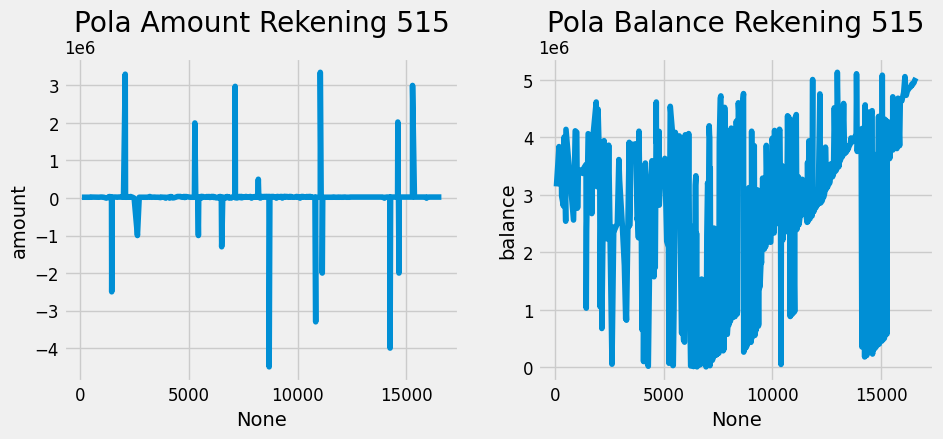

--------------------------------------------------
Analisis Transaksi untuk Rekening: 6583
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     609.000000  6.090000e+02     609.0    609.0  609.000000  5.930000e+02  6.090000e+02
mean   326930.466338  2.689103e+08    6583.0  15414.0    1.766831  1.912751e+02  1.557163e+06
std    202059.500301  5.896219e+07       0.0      0.0    1.629745  3.074833e+05  1.411765e+06
min       112.000000  1.466537e+08    6583.0  15414.0    1.000000 -1.800000e+06  1.224380e+03
25%    164987.000000  2.194430e+08    6583.0  15414.0    1.000000  8.142000e+03  3.007161e+05
50%    306433.000000  2.652271e+08    6583.0  15414.0    1.000000  8.142000e+03  1.033154e+06
75%    517573.000000  3.154931e+08    6583.0  15414.0    1.000000  8.142000e+03  2.551160e+06
max    652065.000000  3.715285e+08    6583.0  15414.0    7.000000  3.000000e+06  5.642146e+06


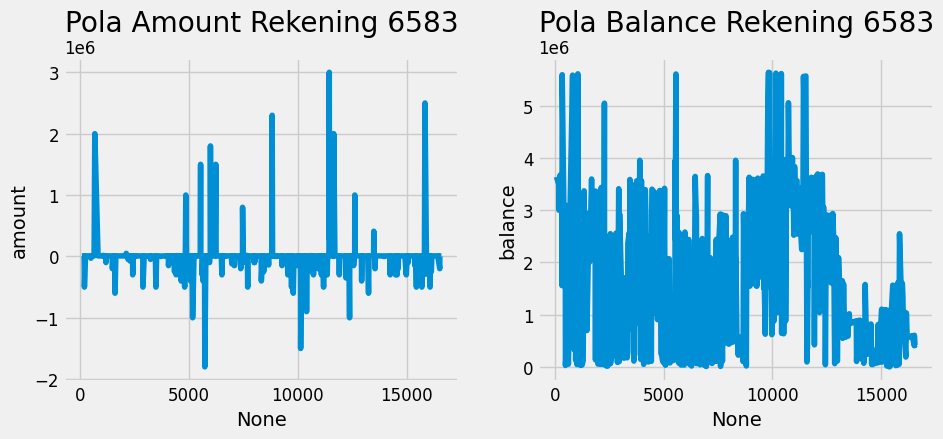

--------------------------------------------------
Analisis Transaksi untuk Rekening: 893
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     355.000000  3.550000e+02     355.0    355.0  355.000000  3.330000e+02  3.550000e+02
mean   310056.661972  2.438700e+08     893.0  15169.0    3.467606  2.649991e+03  7.836701e+06
std    200423.187099  8.988184e+07       0.0      0.0    2.040811  2.032327e+06  4.129194e+06
min      4324.000000  3.887123e+07     893.0  15169.0    1.000000 -1.349900e+07  1.735030e+03
25%    146342.000000  2.118524e+08     893.0  15169.0    1.000000 -2.910000e+05  4.757856e+06
50%    288965.000000  2.540429e+08     893.0  15169.0    5.000000 -9.546020e+03  7.802236e+06
75%    492033.500000  3.146594e+08     893.0  15169.0    5.000000  4.150000e+05  1.159010e+07
max    651806.000000  3.711381e+08     893.0  15169.0    7.000000  1.350000e+07  1.595403e+07


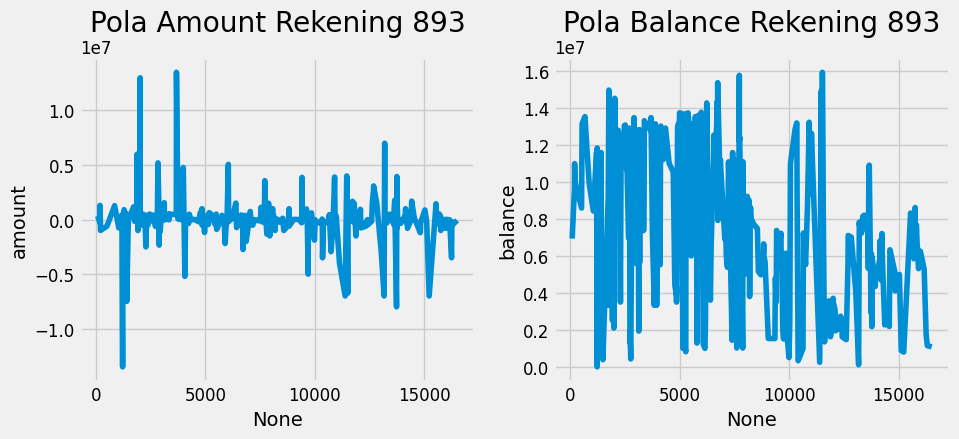

--------------------------------------------------
Analisis Transaksi untuk Rekening: 4090
            trx_code        trx_id  rek_code      rek        type         amount        balance
count     452.000000  4.520000e+02     452.0    452.0  452.000000     438.000000     452.000000
mean   349912.287611  2.810973e+08    4090.0  11745.0    1.442478      98.473721  116256.257080
std    197333.157703  5.068941e+07       0.0      0.0    1.328107   25785.699956   83068.678107
min       155.000000  1.993252e+08    4090.0  11745.0    1.000000 -350000.000000    1848.170000
25%    190672.750000  2.383325e+08    4090.0  11745.0    1.000000    2903.000000   54117.322500
50%    331806.500000  2.761911e+08    4090.0  11745.0    1.000000    2903.000000   96551.010000
75%    542852.000000  3.260685e+08    4090.0  11745.0    1.000000    7117.000000  157416.150000
max    652205.000000  3.713337e+08    4090.0  11745.0    7.000000    7117.000000  360431.860000


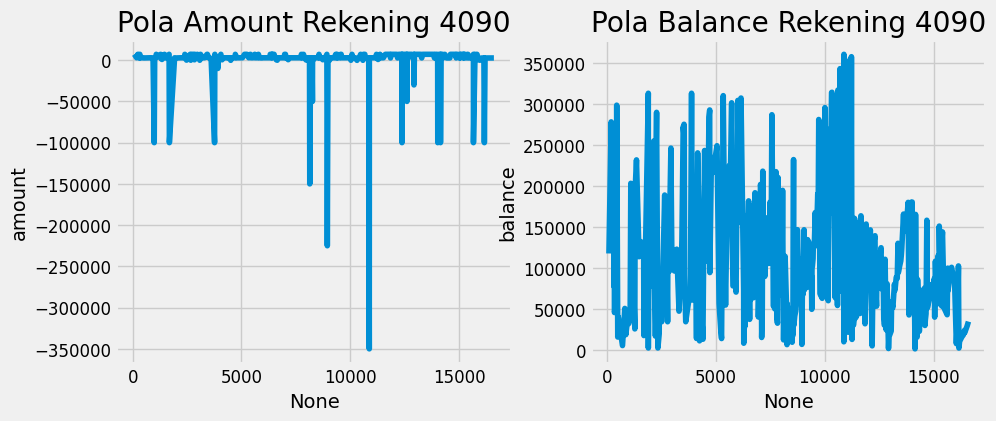

--------------------------------------------------
Analisis Transaksi untuk Rekening: 12429
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     362.000000  3.620000e+02     362.0    362.0  362.000000    351.000000  3.620000e+02
mean   355677.022099  2.988081e+08   12429.0  10694.0    1.303867  21415.106439  3.725279e+06
std    199510.469531  4.087182e+07       0.0      0.0    1.144146   4939.627857  2.183049e+06
min      1229.000000  2.298656e+08   12429.0  10694.0    1.000000  -6275.050000  2.244400e+04
25%    193525.250000  2.627764e+08   12429.0  10694.0    1.000000  22444.000000  1.852020e+06
50%    359447.000000  2.991001e+08   12429.0  10694.0    1.000000  22444.000000  3.703034e+06
75%    531465.750000  3.315058e+08   12429.0  10694.0    1.000000  22444.000000  5.625188e+06
max    651676.000000  3.715301e+08   12429.0  10694.0    7.000000  31375.270000  7.516702e+06


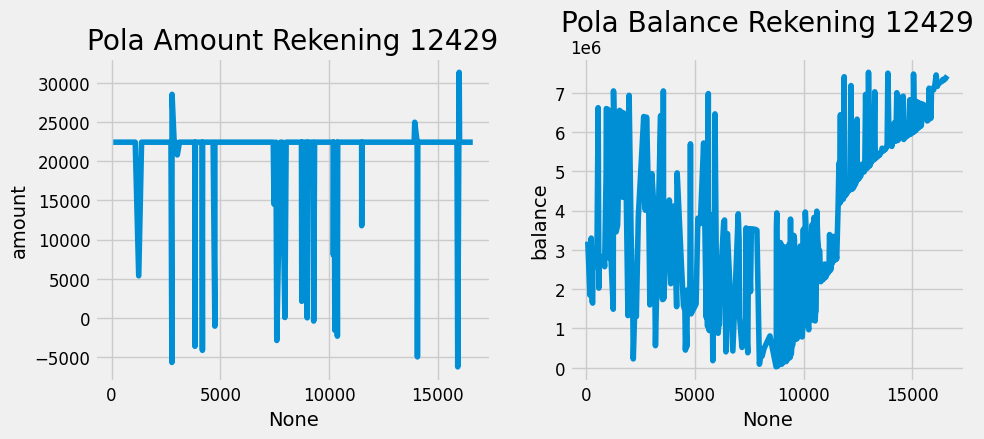

--------------------------------------------------
Analisis Transaksi untuk Rekening: 15927
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     478.000000  4.780000e+02     478.0    478.0  478.000000  4.660000e+02  4.780000e+02
mean   371970.476987  2.999625e+08   15927.0  11920.0    4.615063  4.230952e+03  1.838774e+06
std    194120.815626  4.027363e+07       0.0      0.0    1.243154  5.074182e+05  1.290298e+06
min       172.000000  2.194405e+08   15927.0  11920.0    1.000000 -2.150000e+06  6.179230e+03
25%    205477.250000  2.644001e+08   15927.0  11920.0    5.000000 -6.150000e+04  8.889168e+05
50%    402244.000000  2.980226e+08   15927.0  11920.0    5.000000 -2.400000e+04  1.621692e+06
75%    553822.000000  3.314904e+08   15927.0  11920.0    5.000000 -7.000000e+03  2.593173e+06
max    652224.000000  3.718459e+08   15927.0  11920.0    7.000000  4.000000e+06  5.702378e+06


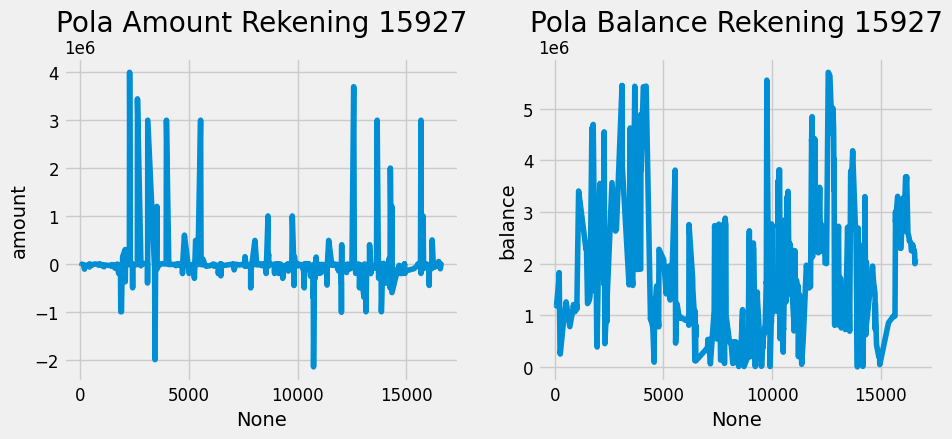

--------------------------------------------------
Analisis Transaksi untuk Rekening: 19084
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     378.000000  3.780000e+02     378.0    378.0  378.000000  3.680000e+02  3.780000e+02
mean   332872.433862  3.085977e+08   19084.0  15442.0    4.005291  1.499776e+05  4.658721e+07
std    187822.555103  3.497065e+07       0.0      0.0    1.776646  1.531720e+06  8.544623e+06
min      1812.000000  2.412858e+08   19084.0  15442.0    1.000000 -3.000000e+06  3.846154e+06
25%    181986.750000  2.808884e+08   19084.0  15442.0    2.000000 -2.000000e+05  4.232250e+07
50%    329958.500000  3.121401e+08   19084.0  15442.0    5.000000 -5.000000e+04  4.661299e+07
75%    504139.750000  3.393100e+08   19084.0  15442.0    5.000000  3.400000e+04  5.139377e+07
max    652190.000000  3.707799e+08   19084.0  15442.0    7.000000  1.500000e+07  6.280126e+07


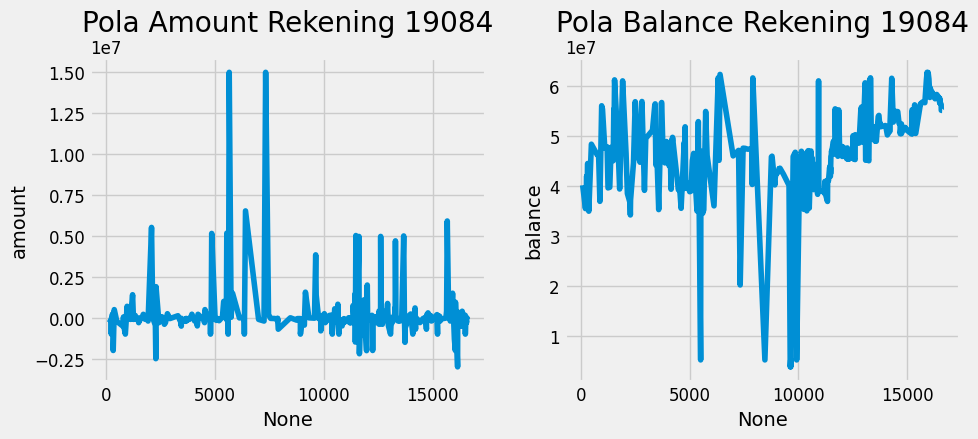

--------------------------------------------------
Analisis Transaksi untuk Rekening: 19108
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     464.000000  4.640000e+02     464.0    464.0  464.000000  4.510000e+02  4.640000e+02
mean   346963.084052  2.825688e+08   19108.0  11284.0    1.323276  7.210204e+03  2.013495e+06
std    205186.396752  4.867527e+07       0.0      0.0    1.166032  2.856834e+05  1.187998e+06
min      1230.000000  2.071448e+08   19108.0  11284.0    1.000000 -3.000000e+06  1.120999e+04
25%    175247.000000  2.395848e+08   19108.0  11284.0    1.000000  1.057000e+04  1.016722e+06
50%    331890.000000  2.779367e+08   19108.0  11284.0    1.000000  2.016900e+04  1.961777e+06
75%    551162.250000  3.254205e+08   19108.0  11284.0    1.000000  2.036100e+04  2.902094e+06
max    652132.000000  3.715279e+08   19108.0  11284.0    7.000000  2.000000e+06  4.566428e+06


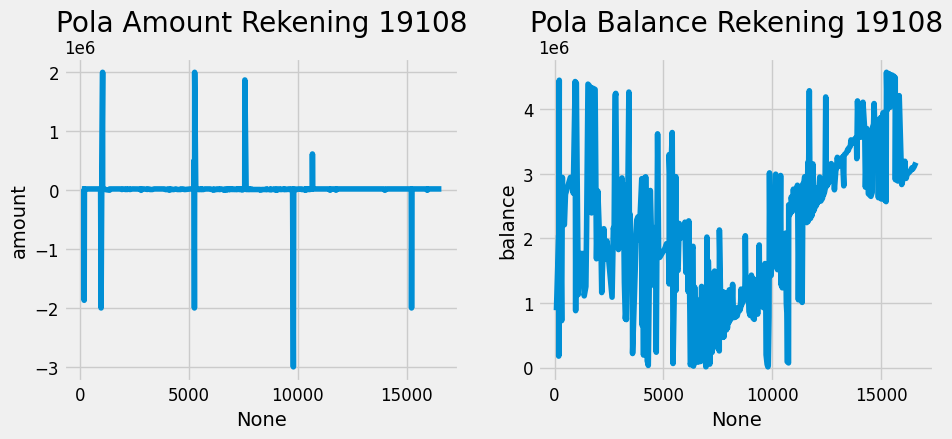

--------------------------------------------------
Analisis Transaksi untuk Rekening: 15382
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     398.000000  3.980000e+02     398.0   398.0  398.000000  3.860000e+02  3.980000e+02
mean   325644.861809  2.928004e+08   15382.0  2864.0    1.301508  6.813595e+04  1.288440e+07
std    201184.117150  4.383474e+07       0.0     0.0    1.139865  2.343659e+05  8.557434e+06
min      1371.000000  2.195132e+08   15382.0  2864.0    1.000000 -2.283998e+04  4.416500e+04
25%    149052.750000  2.521090e+08   15382.0  2864.0    1.000000  5.100000e+04  4.101576e+06
50%    314350.500000  2.890115e+08   15382.0  2864.0    1.000000  5.100000e+04  1.471988e+07
75%    516771.750000  3.285499e+08   15382.0  2864.0    1.000000  5.100000e+04  1.949784e+07
max    651694.000000  3.715288e+08   15382.0  2864.0    7.000000  3.000000e+06  2.630048e+07


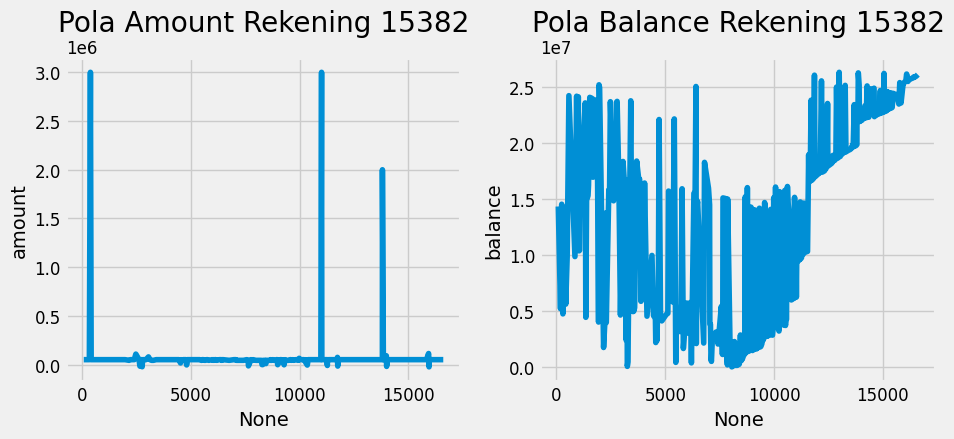

--------------------------------------------------
Analisis Transaksi untuk Rekening: 9718
            trx_code        trx_id  rek_code      rek        type          amount       balance
count     427.000000  4.270000e+02     427.0    427.0  427.000000      412.000000  4.270000e+02
mean   348722.058548  2.748534e+08    9718.0  10957.0    1.498829       21.975485  4.540600e+05
std    202386.791540  5.313119e+07       0.0      0.0    1.408183   105407.641669  3.264198e+05
min       122.000000  1.756220e+08    9718.0  10957.0    1.000000 -1000000.000000  1.000790e+03
25%    180728.500000  2.285585e+08    9718.0  10957.0    1.000000    17858.000000  2.028588e+05
50%    328515.000000  2.752910e+08    9718.0  10957.0    1.000000    17858.000000  3.825767e+05
75%    555378.500000  3.152787e+08    9718.0  10957.0    1.000000    17858.000000  6.226197e+05
max    651675.000000  3.704702e+08    9718.0  10957.0    7.000000    20000.000000  1.319427e+06


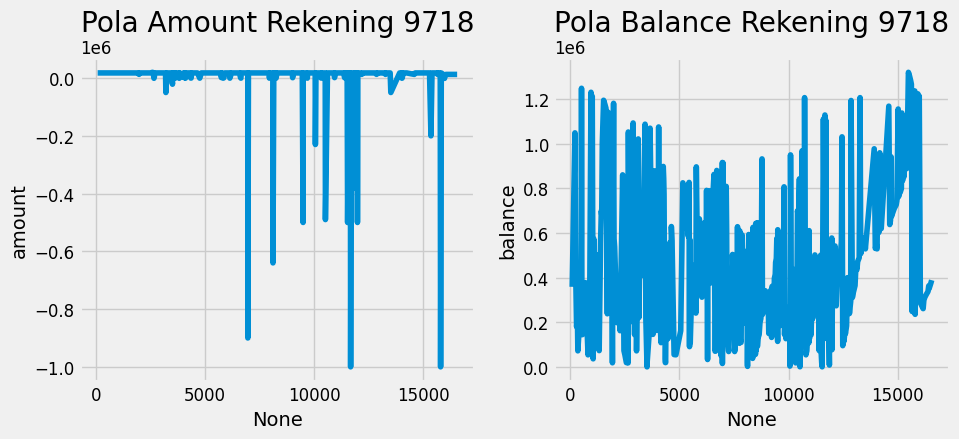

--------------------------------------------------
Analisis Transaksi untuk Rekening: 3821
            trx_code        trx_id  rek_code      rek        type        amount       balance
count     506.000000  5.060000e+02     506.0    506.0  506.000000  4.800000e+02  5.060000e+02
mean   284802.549407  2.025195e+08    3821.0  15923.0    3.677866  9.272101e+03  7.135719e+06
std    192069.491366  1.049491e+08       0.0      0.0    1.968309  1.665586e+06  6.121838e+06
min      1487.000000  9.927624e+06    3821.0  15923.0    1.000000 -1.300000e+07  1.066740e+03
25%    124951.250000  1.019370e+08    3821.0  15923.0    1.000000 -1.236250e+05  2.147856e+06
50%    246624.500000  2.179922e+08    3821.0  15923.0    5.000000 -1.500000e+04  5.645859e+06
75%    434979.750000  2.871921e+08    3821.0  15923.0    5.000000  1.087500e+05  8.821837e+06
max    652350.000000  3.713558e+08    3821.0  15923.0    7.000000  9.900000e+06  2.455048e+07


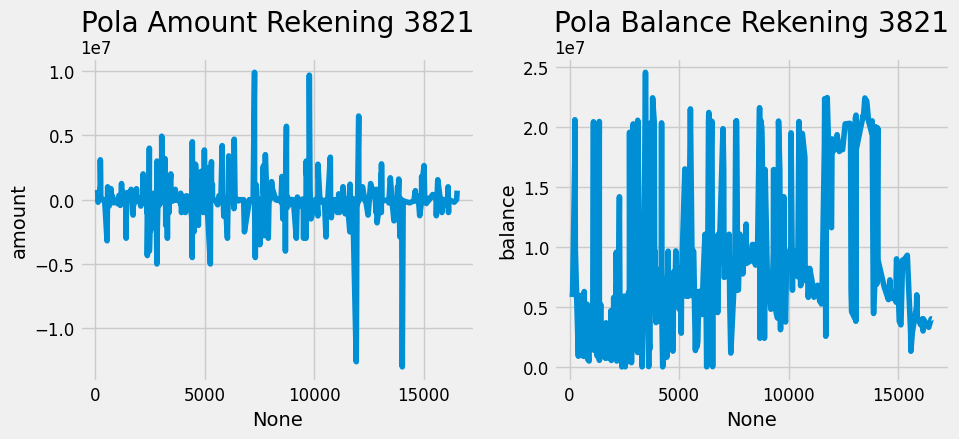

--------------------------------------------------
Analisis Transaksi untuk Rekening: 2524
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     542.000000  5.420000e+02     542.0   542.0  542.000000  5.220000e+02  5.420000e+02
mean   319794.267528  2.375573e+08    2524.0  9210.0    4.188192  3.467433e+04  9.440146e+06
std    198943.747371  6.941215e+07       0.0     0.0    1.677735  1.231005e+06  4.540509e+06
min        49.000000  6.813899e+07    2524.0  9210.0    1.000000 -1.690000e+07  1.063530e+03
25%    134694.250000  1.898587e+08    2524.0  9210.0    4.000000 -1.000000e+05  6.077942e+06
50%    302825.000000  2.386731e+08    2524.0  9210.0    5.000000 -2.100000e+04  8.681606e+06
75%    505714.750000  2.890624e+08    2524.0  9210.0    5.000000 -1.000000e+03  1.317911e+07
max    650943.000000  3.706169e+08    2524.0  9210.0    7.000000  1.585000e+07  1.850579e+07


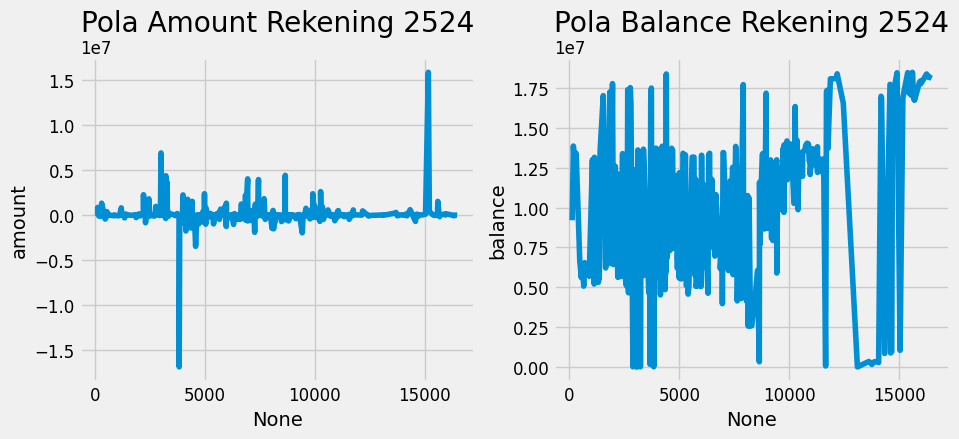

--------------------------------------------------
Analisis Transaksi untuk Rekening: 14301
            trx_code        trx_id  rek_code     rek         type        amount       balance
count    1693.000000  1.693000e+03    1693.0  1693.0  1693.000000  1.689000e+03  1.693000e+03
mean   331306.059657  3.549960e+08   14301.0  2673.0     4.303603  2.368265e+03  8.300300e+06
std    185049.829268  1.262432e+07       0.0     0.0     1.520146  1.273661e+06  8.578221e+06
min       185.000000  3.272651e+08   14301.0  2673.0     1.000000 -1.100000e+07  0.000000e+00
25%    167509.000000  3.445829e+08   14301.0  2673.0     5.000000 -3.000000e+05  1.000000e+06
50%    332526.000000  3.565050e+08   14301.0  2673.0     5.000000 -1.050000e+05  5.900000e+06
75%    508972.000000  3.679670e+08   14301.0  2673.0     5.000000 -1.000000e+05  1.390000e+07
max    649087.000000  3.718734e+08   14301.0  2673.0     7.000000  3.000000e+07  3.950000e+07


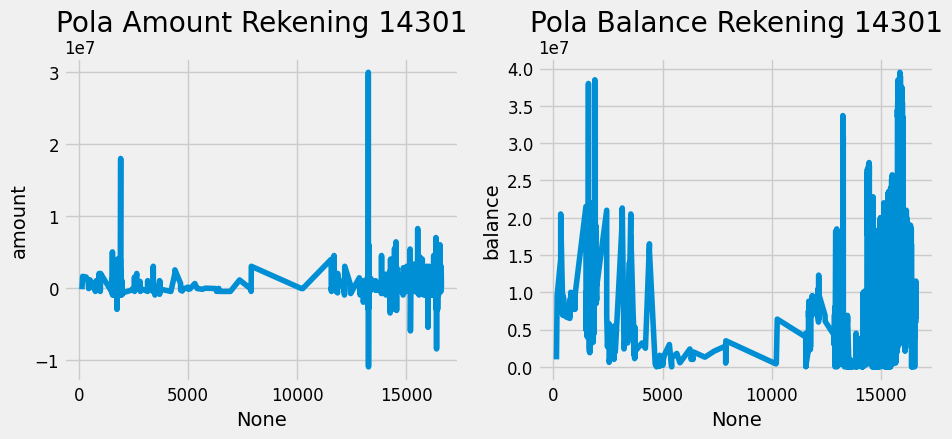

--------------------------------------------------
Analisis Transaksi untuk Rekening: 1688
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     468.000000  4.680000e+02     468.0   468.0  468.000000  4.520000e+02  4.680000e+02
mean   354764.873932  2.632553e+08    1688.0  7977.0    3.288462  7.503960e+00  1.292959e+06
std    200192.219901  4.522622e+07       0.0     0.0    2.037159  8.008939e+05  1.194268e+06
min      3434.000000  1.453088e+08    1688.0  7977.0    1.000000 -5.000000e+06  1.174060e+03
25%    182112.250000  2.290474e+08    1688.0  7977.0    1.000000 -1.000000e+05  5.011780e+05
50%    335093.500000  2.538204e+08    1688.0  7977.0    5.000000 -1.334645e+03  8.952993e+05
75%    561899.500000  2.907597e+08    1688.0  7977.0    5.000000  3.050000e+04  1.873213e+06
max    651637.000000  3.628080e+08    1688.0  7977.0    7.000000  3.750000e+06  6.988368e+06


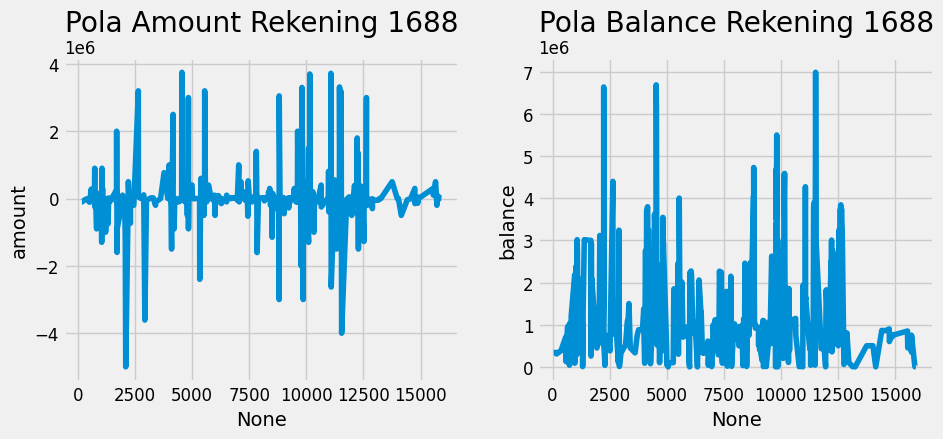

--------------------------------------------------
Analisis Transaksi untuk Rekening: 19034
            trx_code        trx_id  rek_code     rek        type         amount        balance
count     380.000000  3.800000e+02     380.0   380.0  380.000000     365.000000     380.000000
mean   339117.102632  2.691896e+08   19034.0  7354.0    1.710526     141.216932   61414.797263
std    200245.557693  5.020363e+07       0.0     0.0    1.606515   29000.238312   56505.057413
min       609.000000  1.897680e+08   19034.0  7354.0    1.000000 -257592.000000    1000.040000
25%    176503.500000  2.278396e+08   19034.0  7354.0    1.000000    4966.000000   20893.932500
50%    323487.500000  2.719531e+08   19034.0  7354.0    1.000000    4966.000000   41534.460000
75%    539683.250000  3.123768e+08   19034.0  7354.0    1.000000    4966.000000   85692.200000
max    652381.000000  3.700874e+08   19034.0  7354.0    7.000000  252600.000000  258592.450000


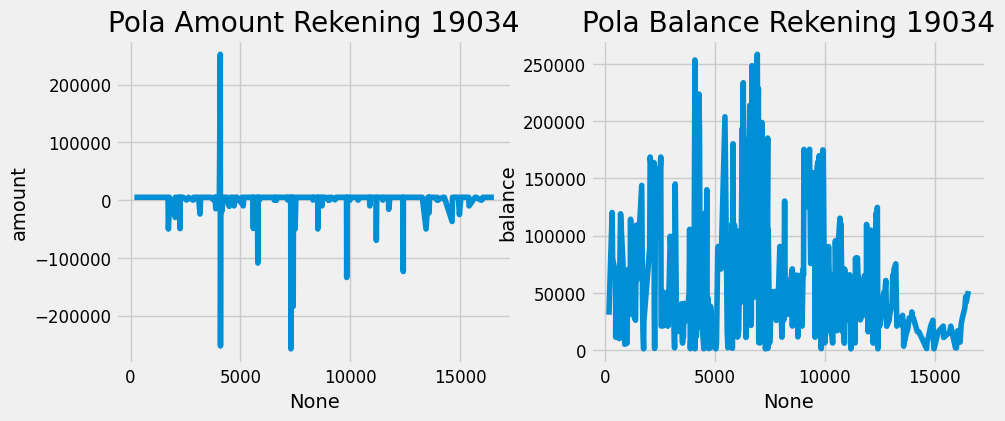

--------------------------------------------------
Analisis Transaksi untuk Rekening: 2297
            trx_code        trx_id  rek_code     rek        type         amount        balance
count     379.000000  3.790000e+02     379.0   379.0  379.000000     364.000000     379.000000
mean   340970.345646  2.686932e+08    2297.0  7638.0    1.670185     141.536374   65623.260026
std    200033.943696  5.023176e+07       0.0     0.0    1.573401   31416.443704   62438.700462
min        43.000000  1.897677e+08    2297.0  7638.0    1.000000 -292682.000000    1000.040000
25%    172014.000000  2.269649e+08    2297.0  7638.0    1.000000    4966.000000   21731.160000
50%    324801.000000  2.678148e+08    2297.0  7638.0    1.000000    4966.000000   45695.600000
75%    546585.500000  3.119902e+08    2297.0  7638.0    1.000000    4966.000000   90388.880000
max    652327.000000  3.700899e+08    2297.0  7638.0    7.000000  287700.000000  293682.040000


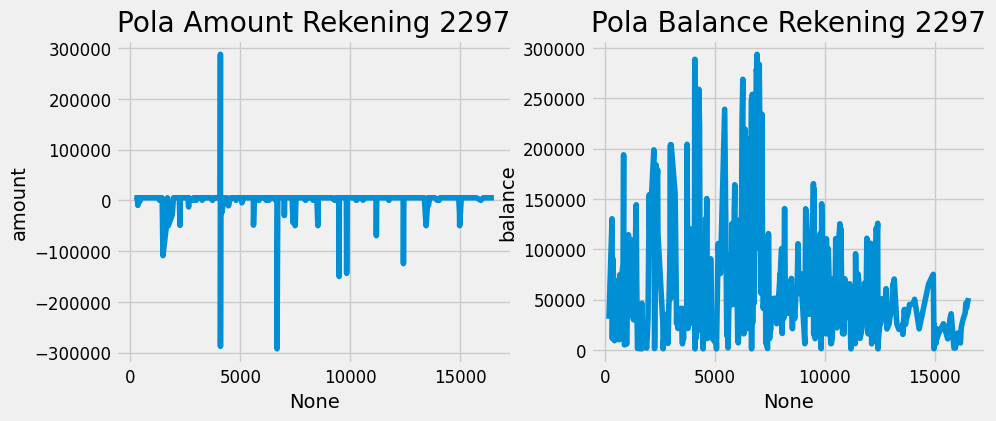

--------------------------------------------------
Analisis Transaksi untuk Rekening: 11213
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     419.000000  4.190000e+02     419.0   419.0  419.000000  4.050000e+02  4.190000e+02
mean   355305.632458  2.809985e+08   11213.0  1734.0    1.582339  1.120157e+02  6.007536e+05
std    199627.046333  4.885487e+07       0.0     0.0    1.481876  2.746108e+05  6.185912e+05
min      1287.000000  2.008640e+08   11213.0  1734.0    1.000000 -2.700000e+06  1.000000e+03
25%    178344.500000  2.391458e+08   11213.0  1734.0    1.000000  4.032300e+04  1.753704e+05
50%    351776.000000  2.757938e+08   11213.0  1734.0    1.000000  4.411300e+04  3.648388e+05
75%    558883.000000  3.199493e+08   11213.0  1734.0    1.000000  4.411300e+04  8.105633e+05
max    650416.000000  3.715284e+08   11213.0  1734.0    7.000000  1.249861e+06  2.740280e+06


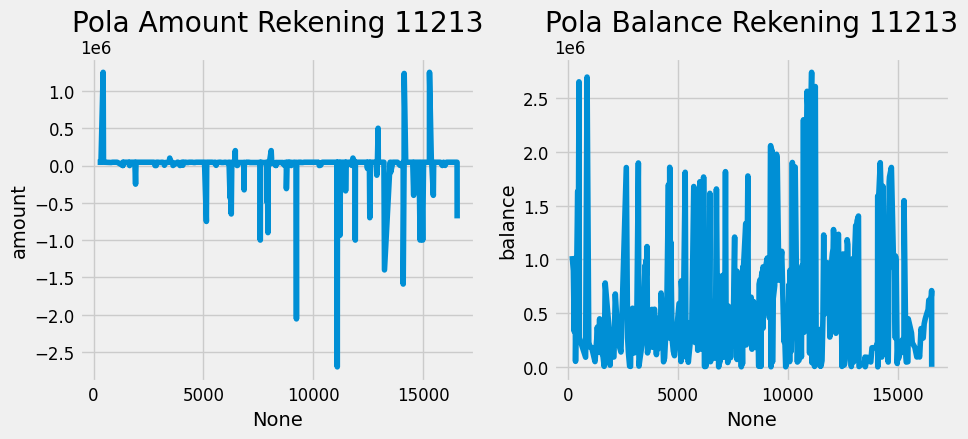

--------------------------------------------------
Analisis Transaksi untuk Rekening: 18084
            trx_code        trx_id  rek_code     rek        type        amount       balance
count     361.000000  3.610000e+02     361.0   361.0  361.000000  3.470000e+02  3.610000e+02
mean   362419.825485  2.808426e+08   18084.0  6376.0    4.124654  8.674386e+02  2.982299e+06
std    188620.923715  4.917049e+07       0.0     0.0    1.725133  1.026182e+06  1.808325e+06
min      2029.000000  1.977502e+08   18084.0  6376.0    1.000000 -6.000000e+06  1.000960e+03
25%    199812.000000  2.299614e+08   18084.0  6376.0    4.000000 -1.000000e+05  1.650011e+06
50%    357718.000000  2.865344e+08   18084.0  6376.0    5.000000 -5.000000e+04  3.001834e+06
75%    523453.000000  3.253620e+08   18084.0  6376.0    5.000000 -2.917850e+02  4.000475e+06
max    652091.000000  3.693387e+08   18084.0  6376.0    7.000000  4.200000e+06  8.600475e+06


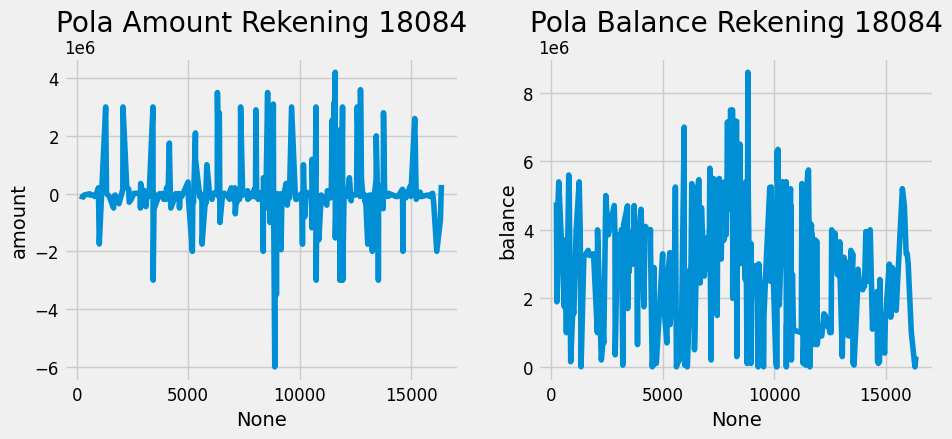

--------------------------------------------------


In [ ]:
# Analisis pola transaksi untuk setiap rekening
for rek in dfTrain_sorted['rek_code'].unique():
    rek_data = dfTrain_sorted[dfTrain_sorted['rek_code'] == rek]
    print(f"Analisis Transaksi untuk Rekening: {rek}")
    print(rek_data.describe())  # Statistik deskriptif
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.lineplot(x=rek_data.index, y='amount', data=rek_data)
    plt.title(f'Pola Amount Rekening {rek}')
    plt.subplot(1, 2, 2)
    sns.lineplot(x=rek_data.index, y='balance', data=rek_data)
    plt.title(f'Pola Balance Rekening {rek}')
    plt.show()
    print("-" * 50)

In [ ]:
# Convert 'trx_date' to datetime objects
dfTrain_sorted['creationdate'] = pd.to_datetime(dfTrain_sorted['creationdate'])

In [ ]:
daily_aggregations = dfTrain_sorted.groupby('creationdate').agg(
    daily_transaction_count=('creationdate', 'count'),
    daily_total_amount=('amount', 'sum'),
    daily_average_balance=('balance', 'mean')
)

                           daily_transaction_count  daily_total_amount  daily_average_balance
creationdate                                                                                 
2022-01-26 15:41:53+07:00                        1            425600.0              425600.00
2022-01-28 11:06:56+07:00                        1            200000.0              200000.00
2022-01-29 14:03:57+07:00                        1           -425600.0                   0.00
2022-02-01 00:15:31+07:00                        6                96.4              100036.15
2022-02-02 09:02:24+07:00                        1            850000.0              850059.26
...                                            ...                 ...                    ...
2024-10-21 19:49:33+07:00                        1            -30000.0             1971623.74
2024-10-21 20:21:24+07:00                        1           -500000.0             3500000.00
2024-10-21 21:21:46+07:00                        1          

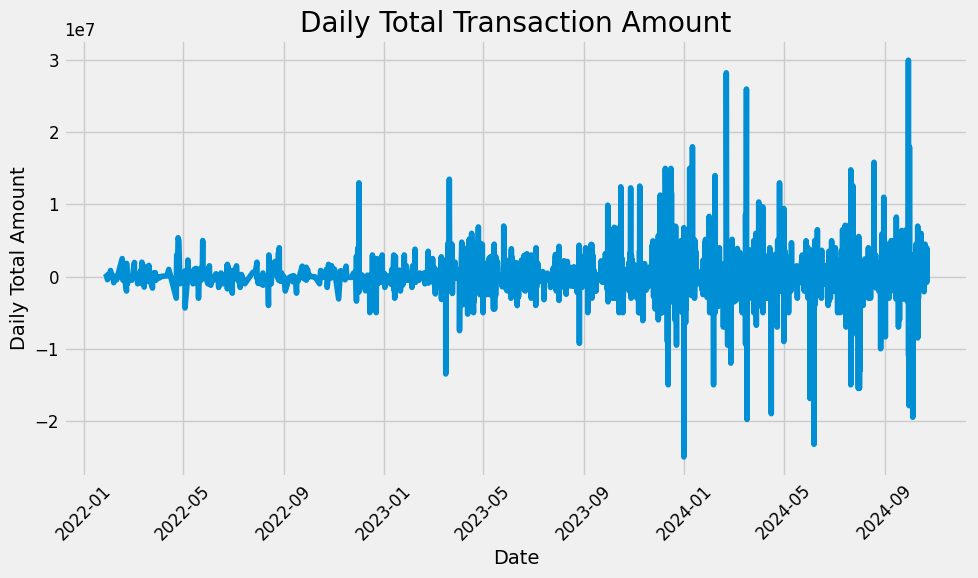

In [ ]:
#Print daily aggregations
print(daily_aggregations)

plt.figure(figsize=(10, 6))
plt.plot(daily_aggregations.index, daily_aggregations['daily_total_amount'])
plt.xlabel('Date')
plt.ylabel('Daily Total Amount')
plt.title('Daily Total Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(array([18992.70833333, 19112.70833333, 19235.70833333, 19357.70833333,
        19477.70833333, 19600.70833333, 19722.70833333, 19843.70833333,
        19966.70833333]),
 [Text(18992.708333333332, 0, '2022-01'),
  Text(19112.708333333332, 0, '2022-05'),
  Text(19235.708333333332, 0, '2022-09'),
  Text(19357.708333333332, 0, '2023-01'),
  Text(19477.708333333332, 0, '2023-05'),
  Text(19600.708333333332, 0, '2023-09'),
  Text(19722.708333333332, 0, '2024-01'),
  Text(19843.708333333332, 0, '2024-05'),
  Text(19966.708333333332, 0, '2024-09')])

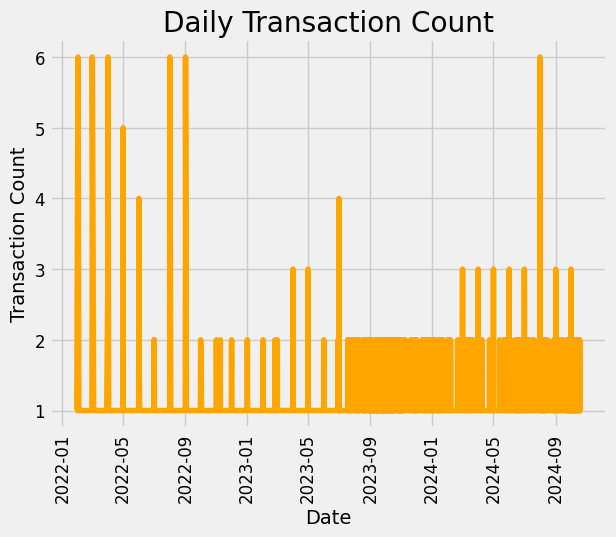

In [ ]:
# Daily transaction count
plt.subplot(1, 1, 1)
plt.plot(daily_aggregations.index, daily_aggregations['daily_transaction_count'], color='orange')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Daily Transaction Count')
plt.xticks(rotation=90)

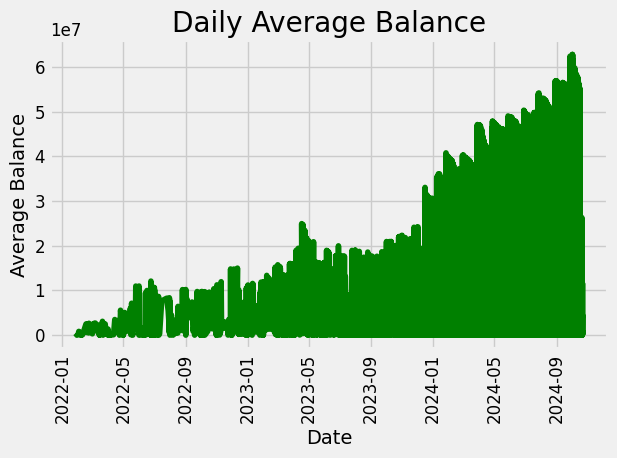

In [ ]:
# Daily average balance
plt.subplot(1, 1, 1)
plt.plot(daily_aggregations.index, daily_aggregations['daily_average_balance'], color='green')
plt.xlabel('Date')
plt.ylabel('Average Balance')
plt.title('Daily Average Balance')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

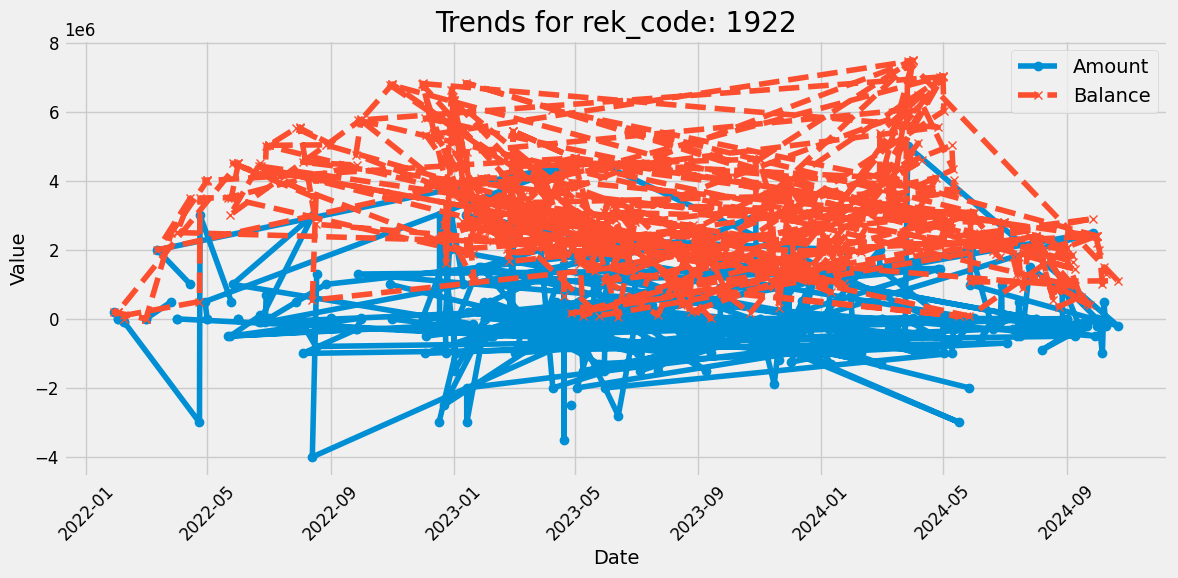

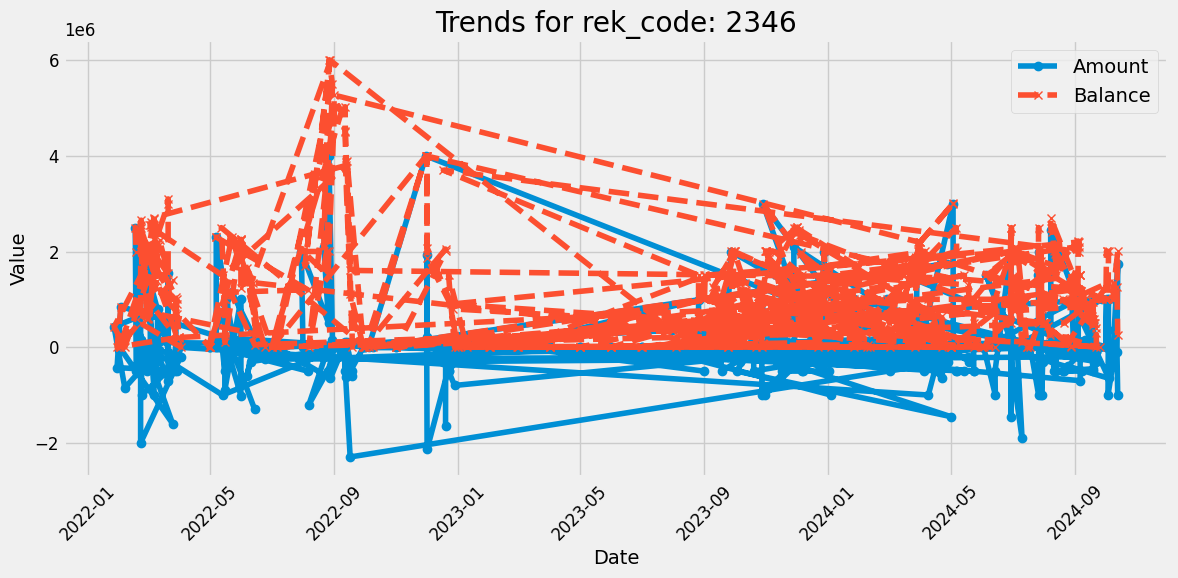

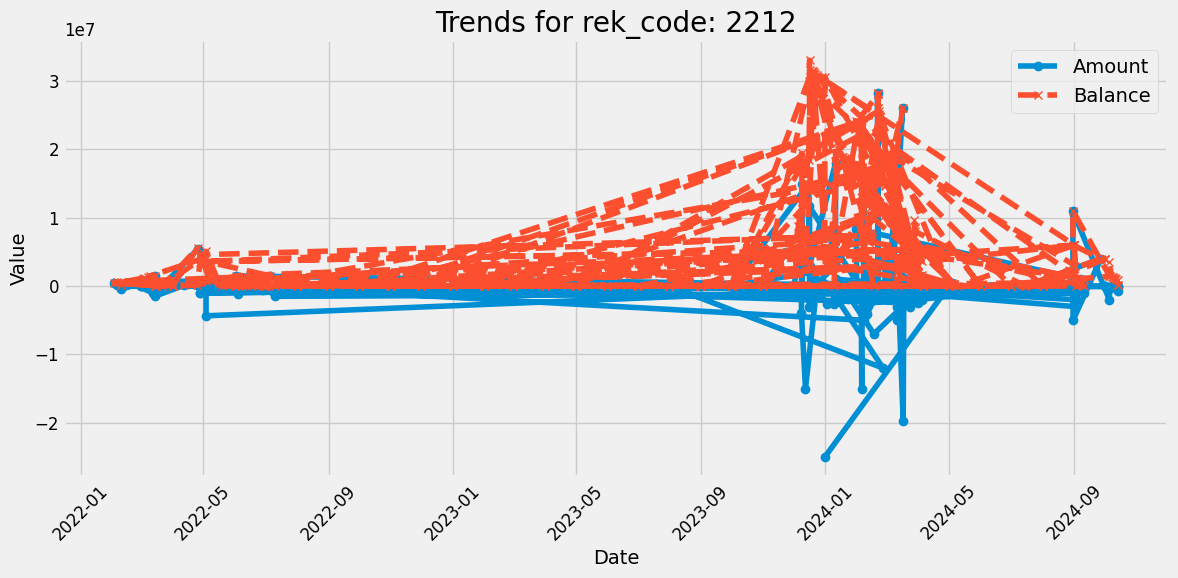

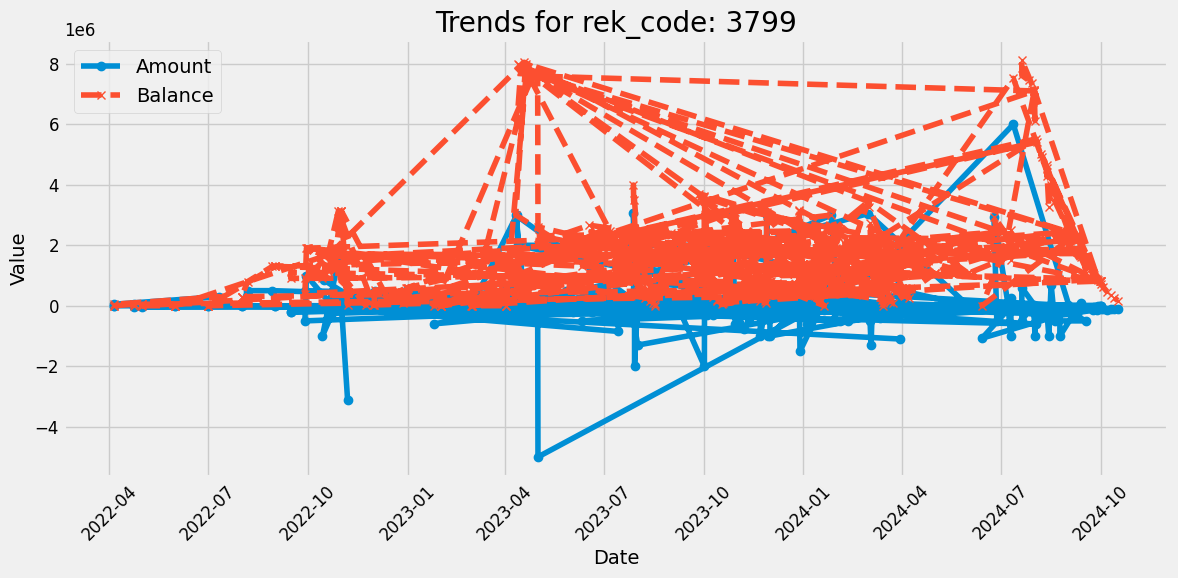

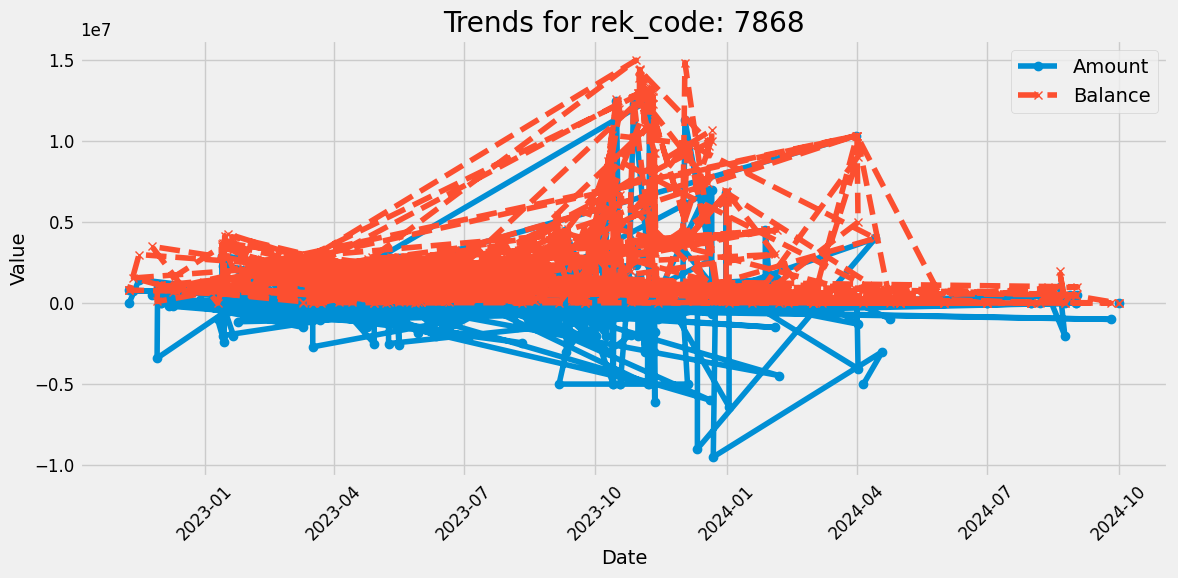

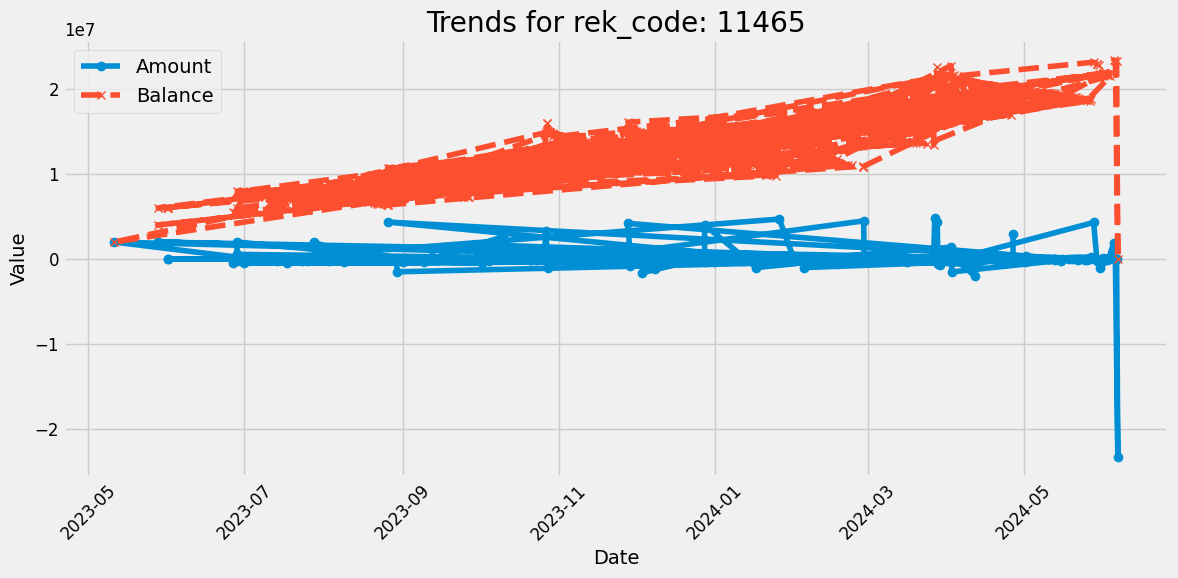

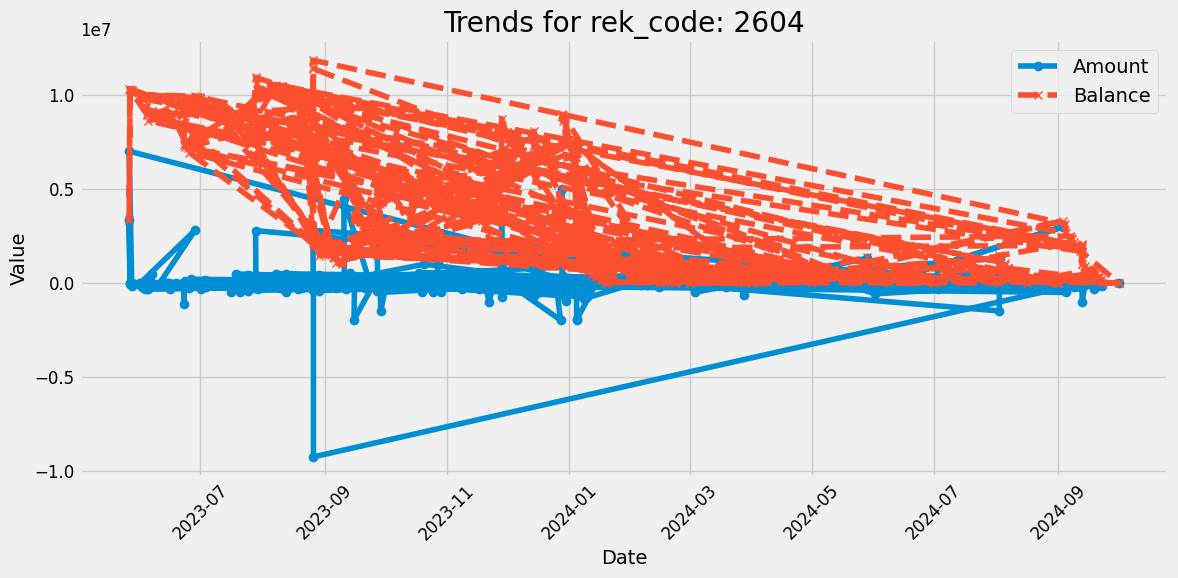

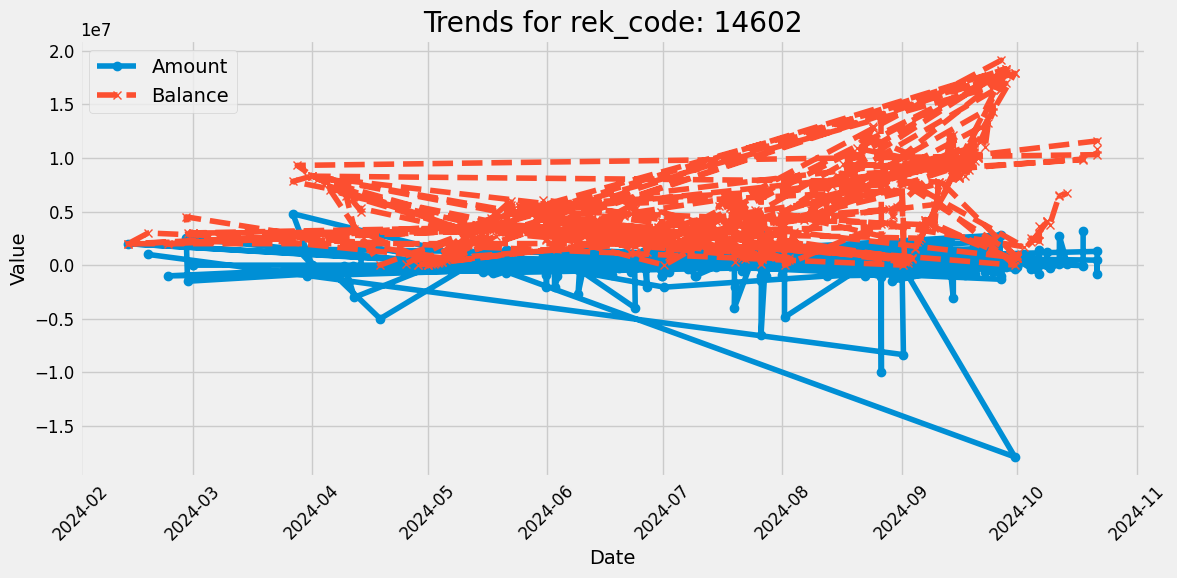

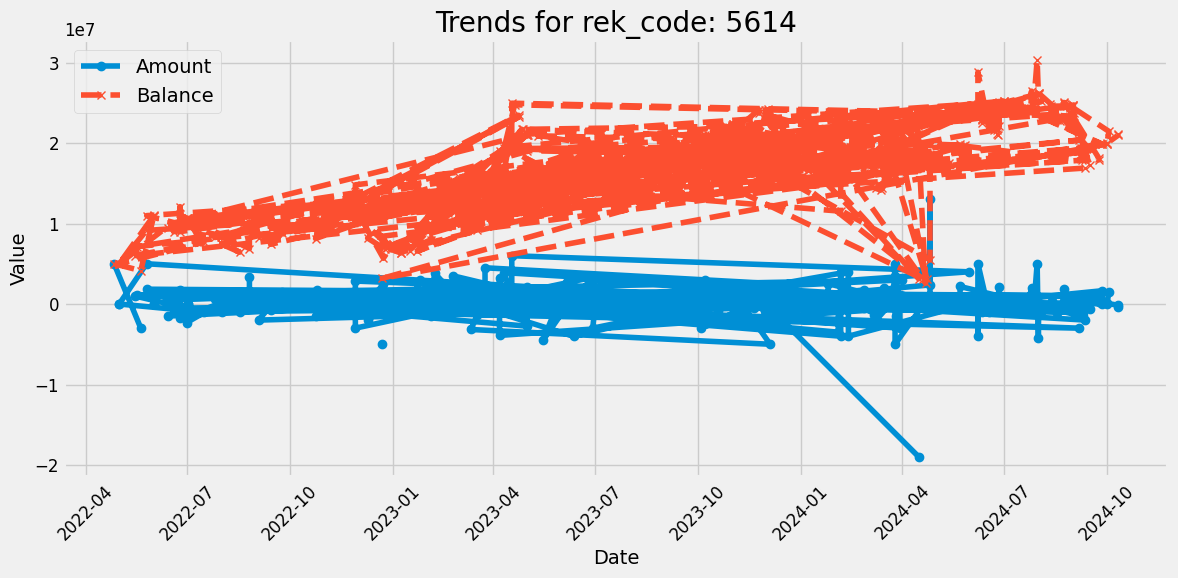

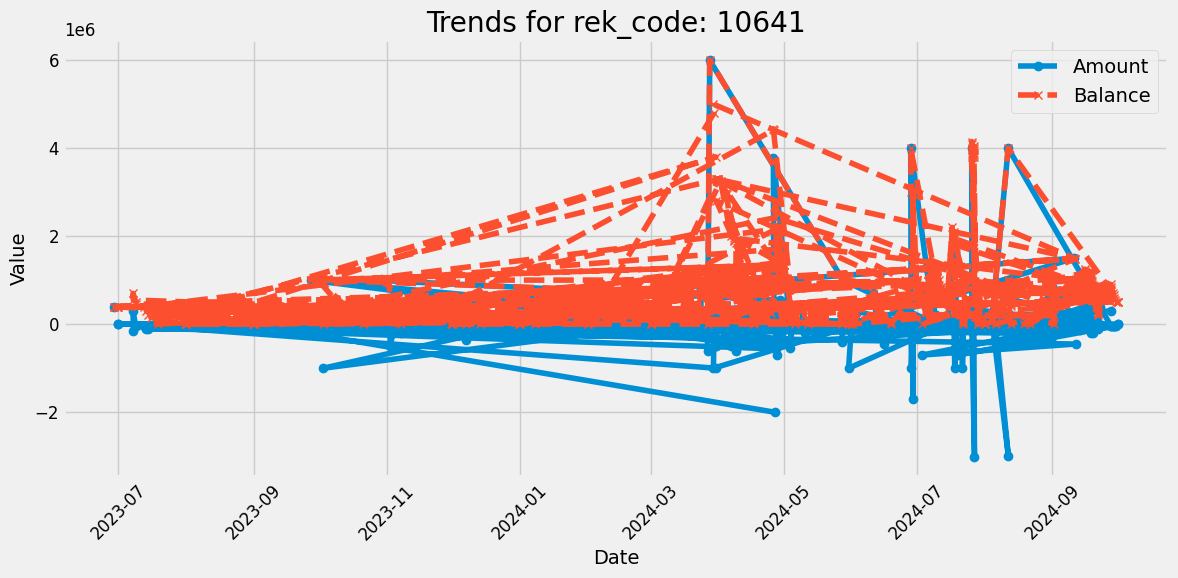

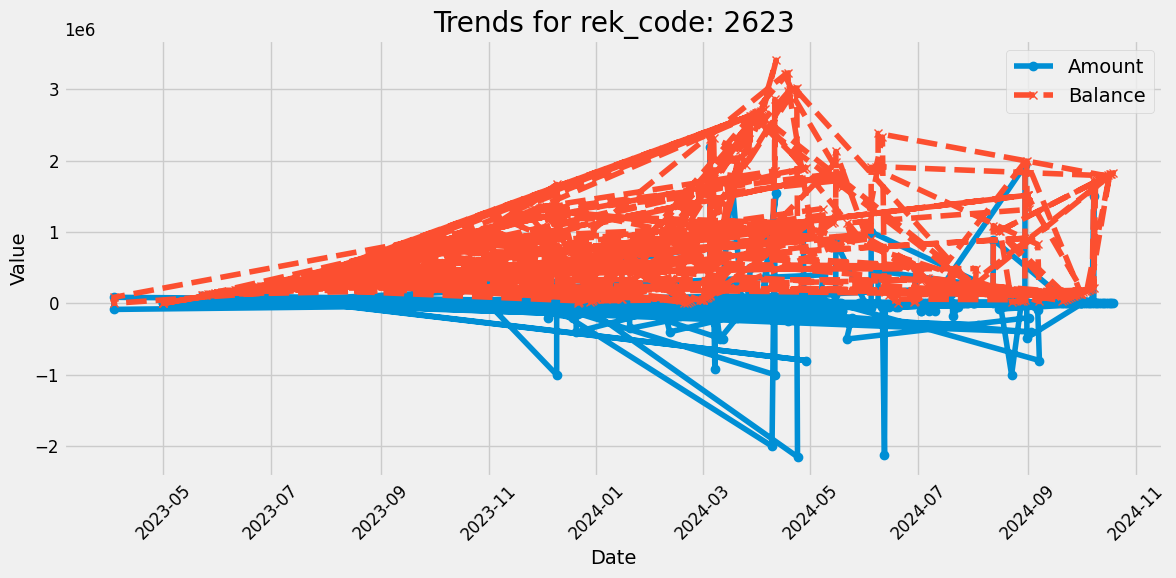

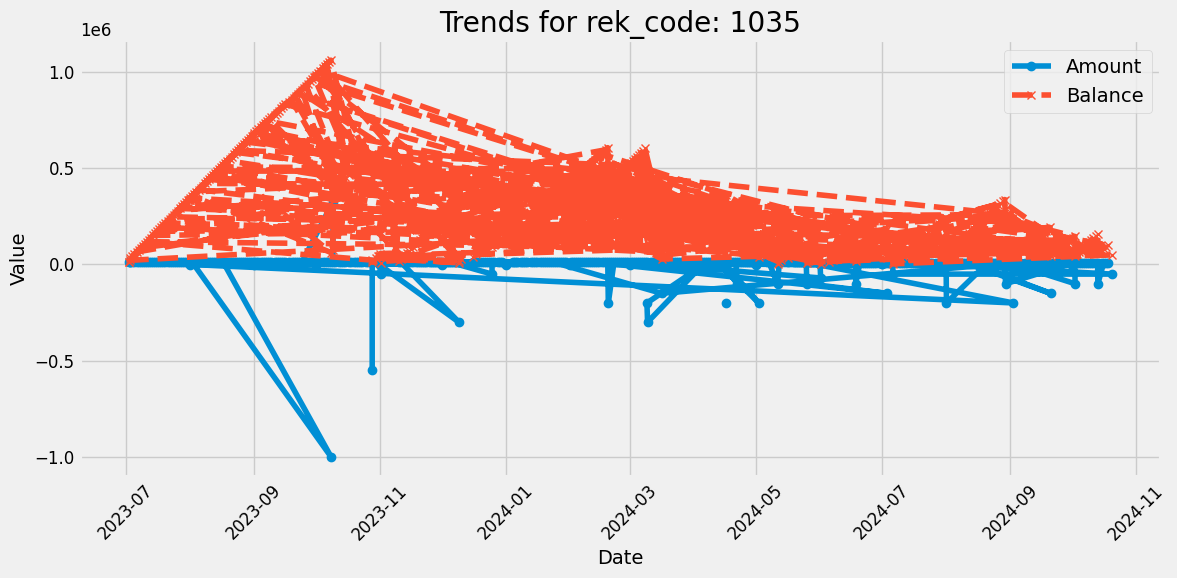

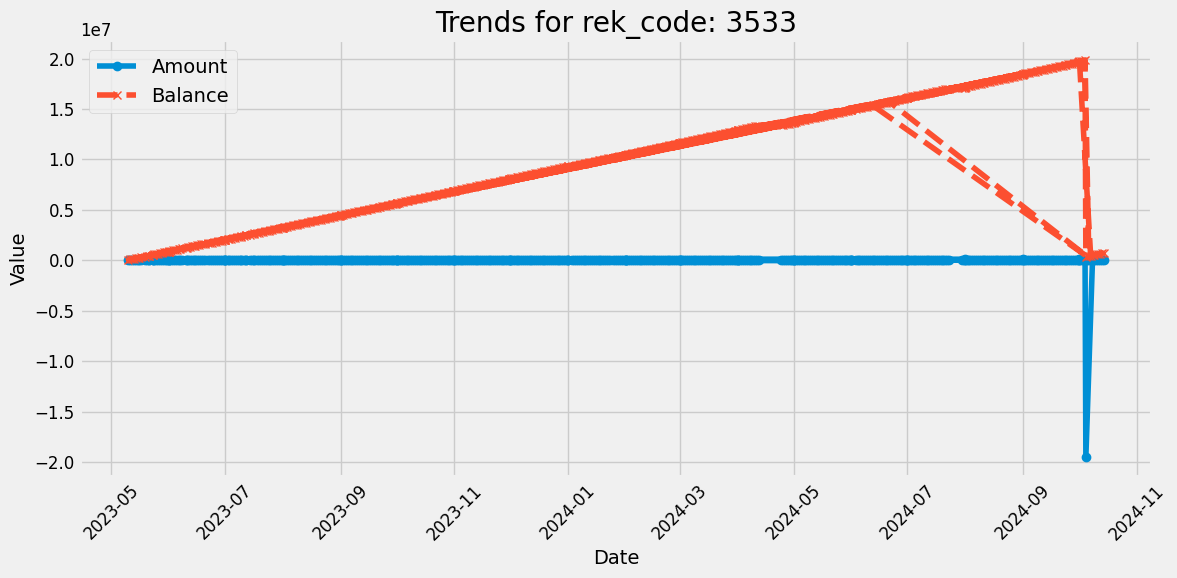

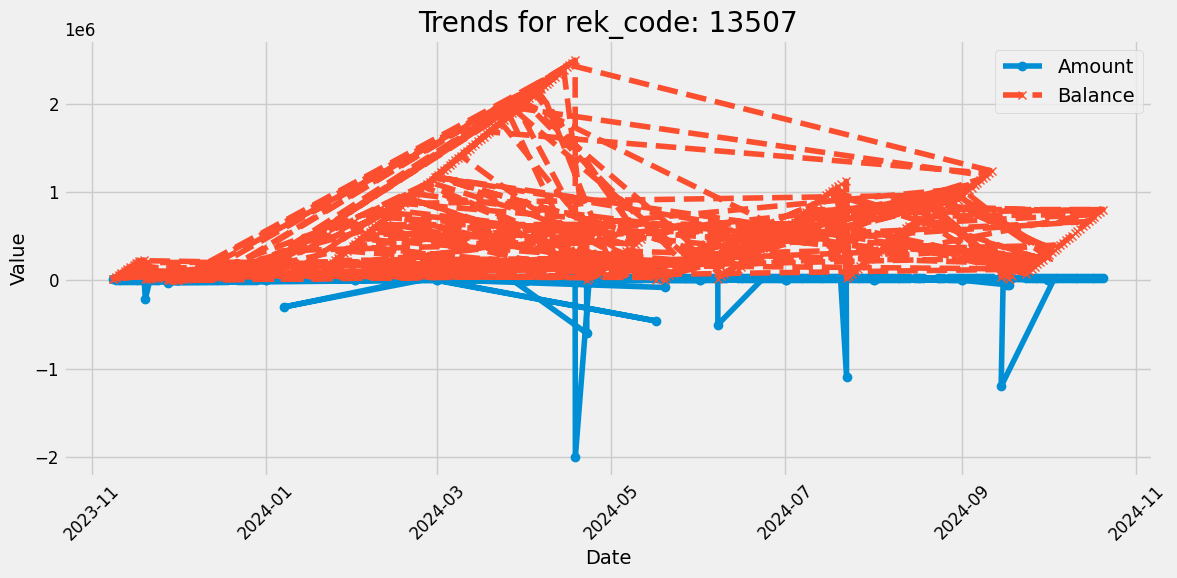

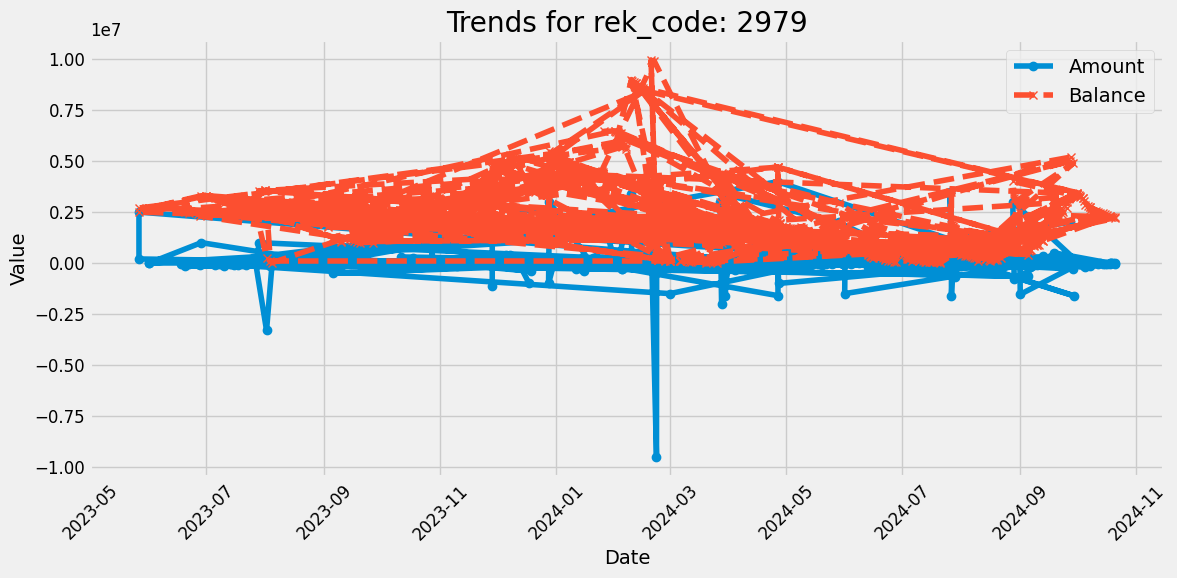

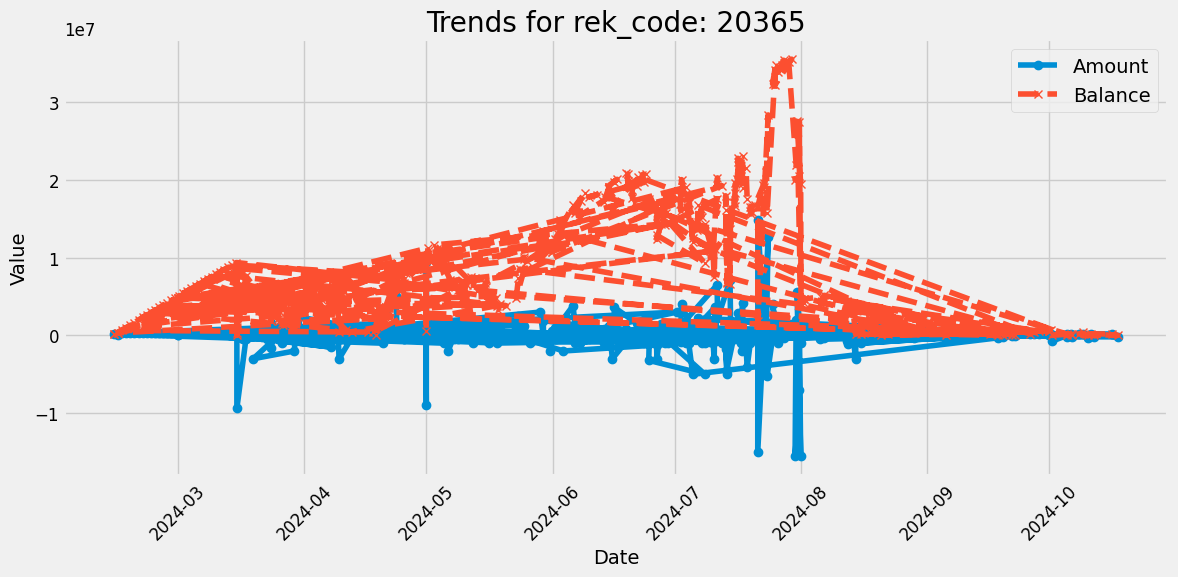

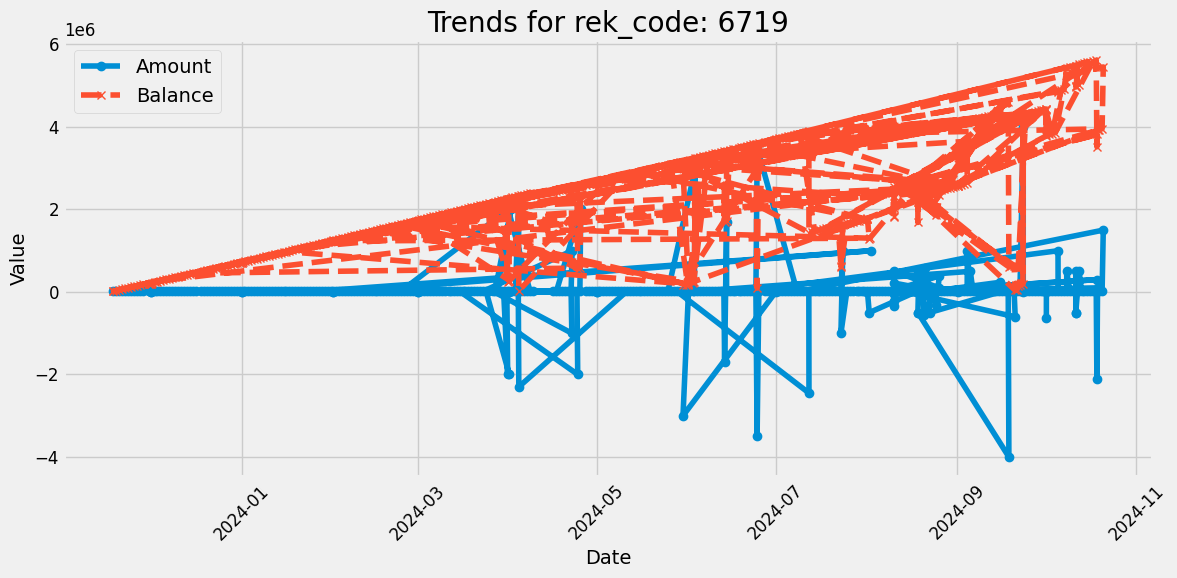

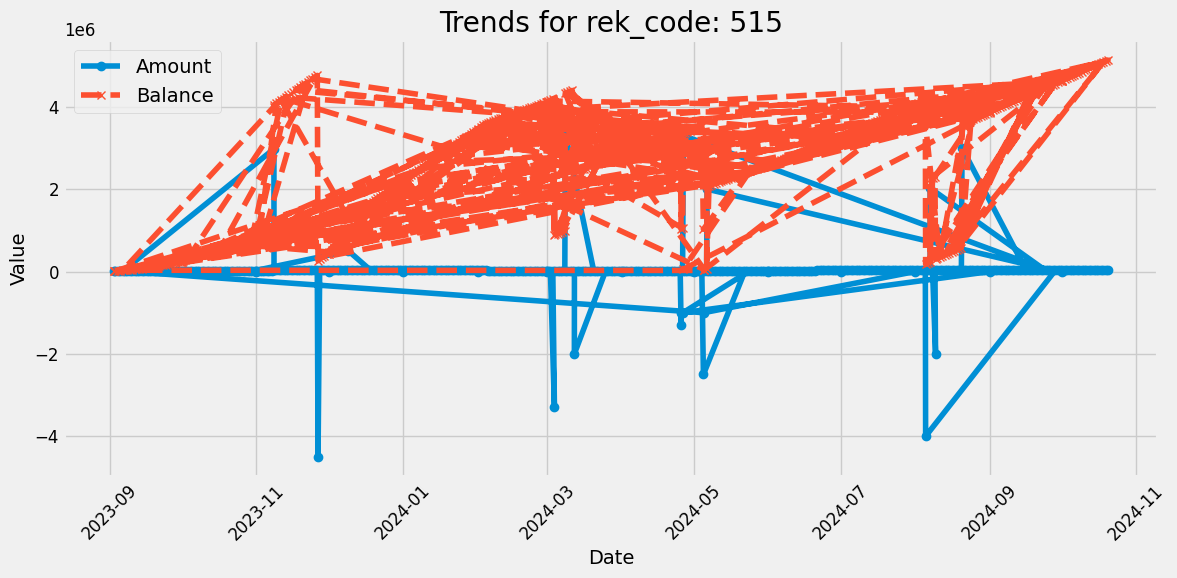

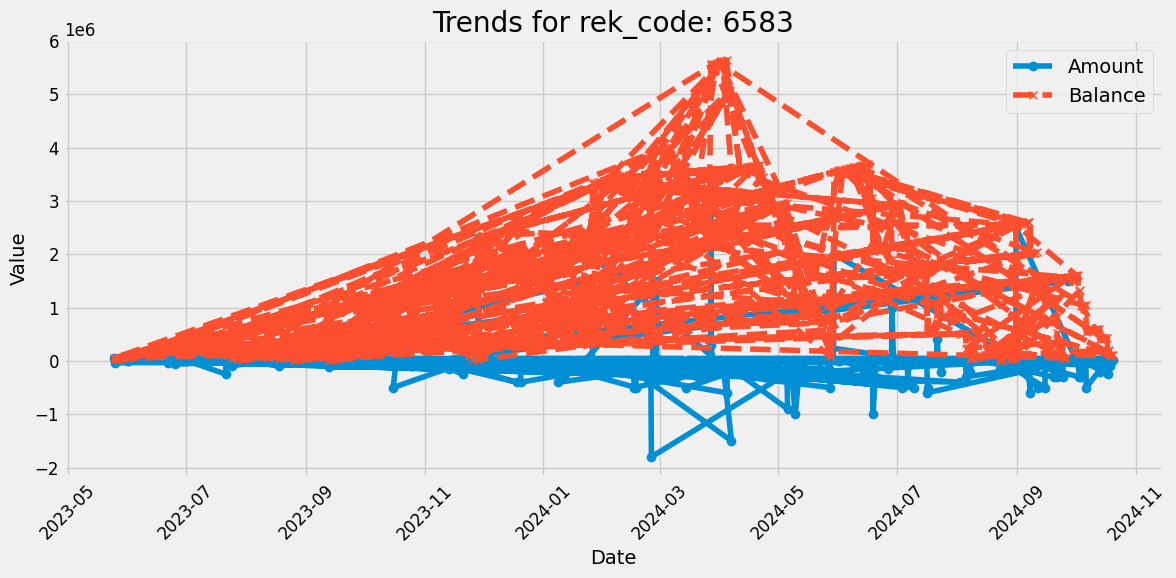

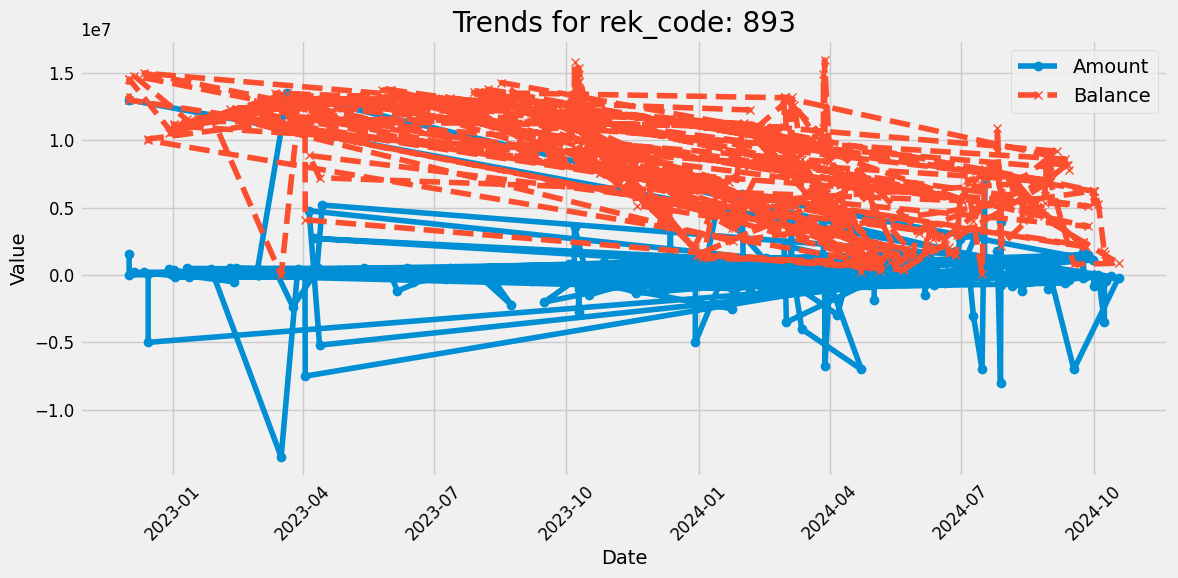

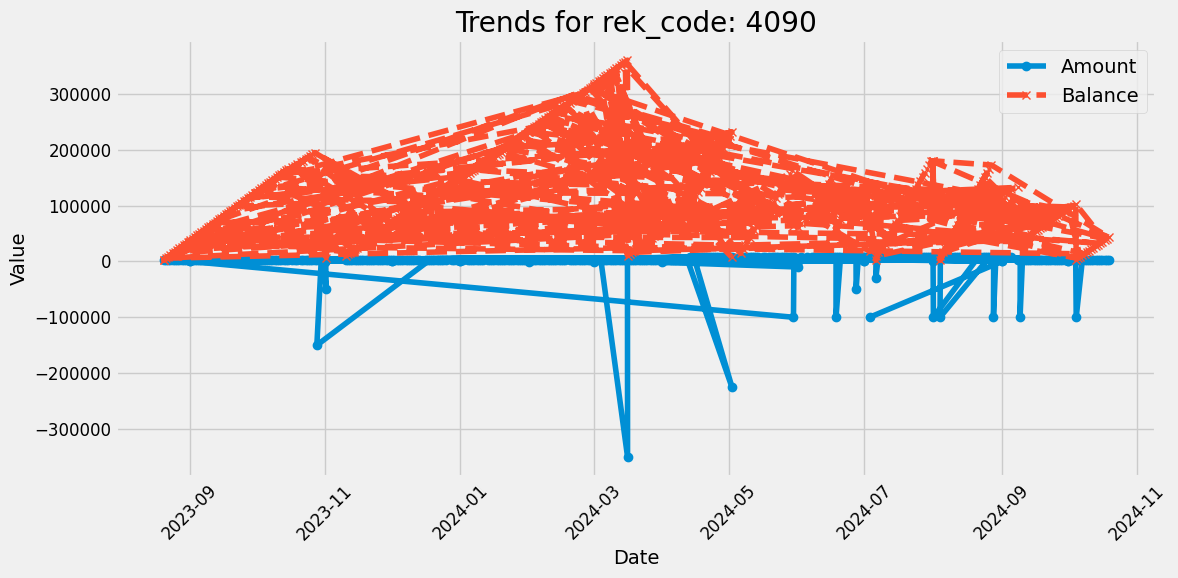

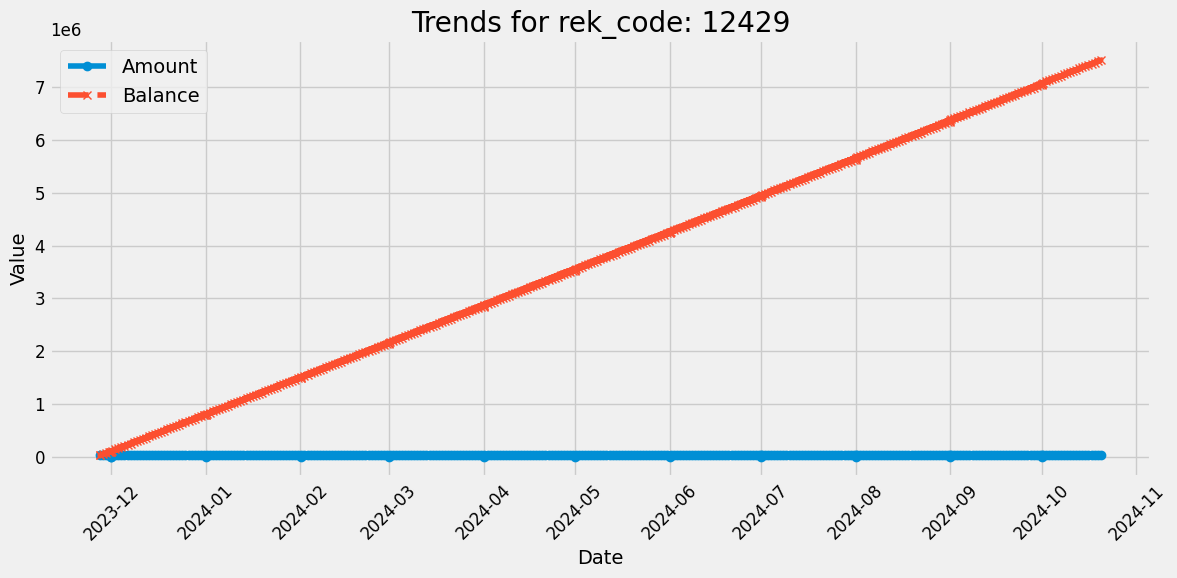

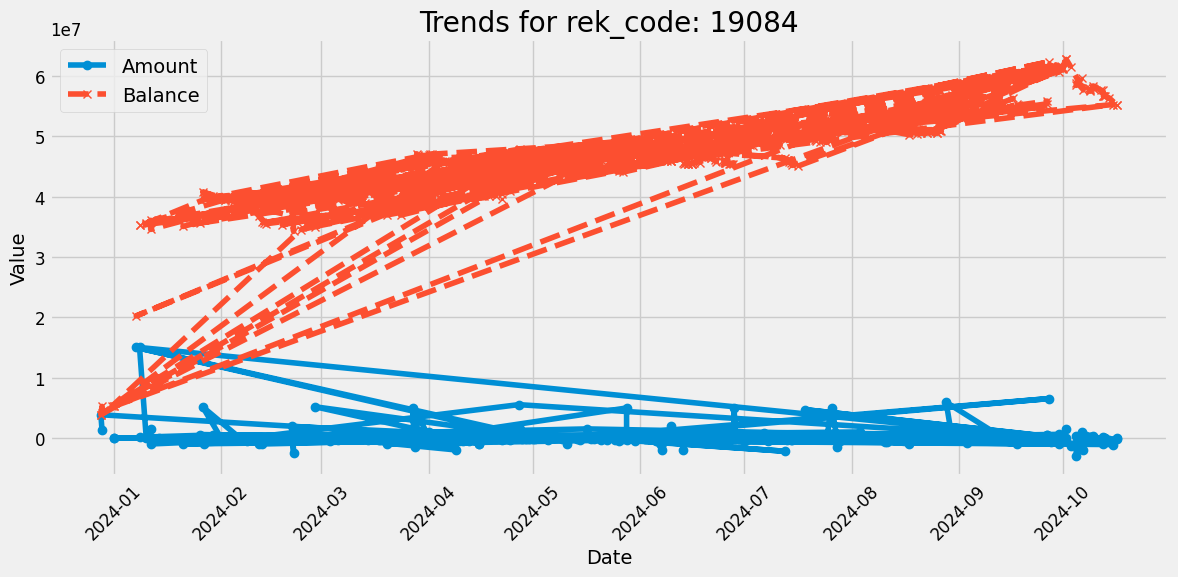

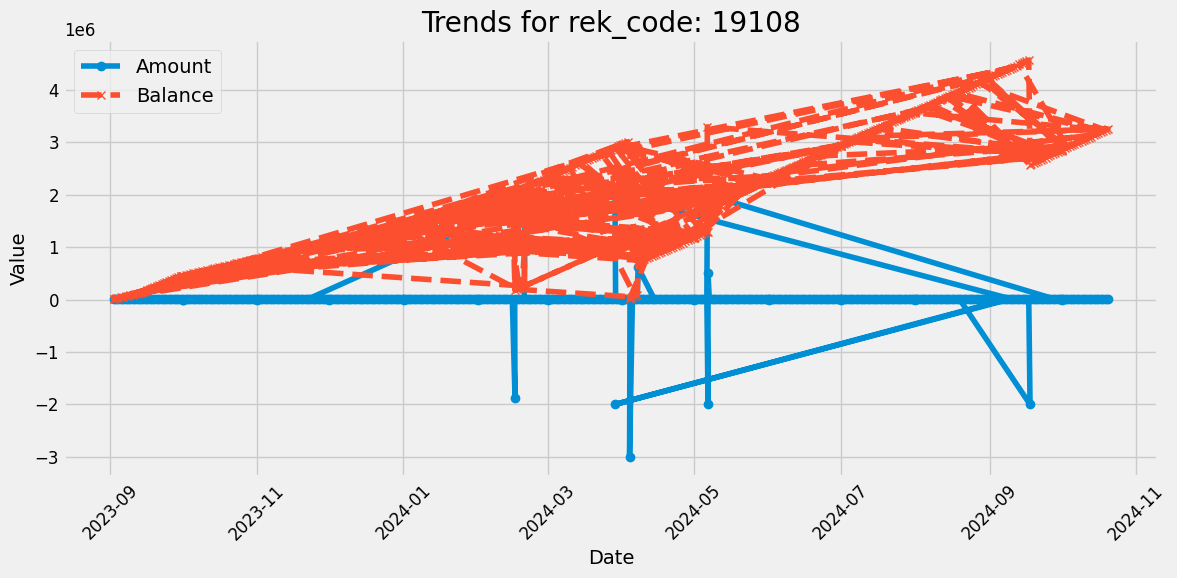

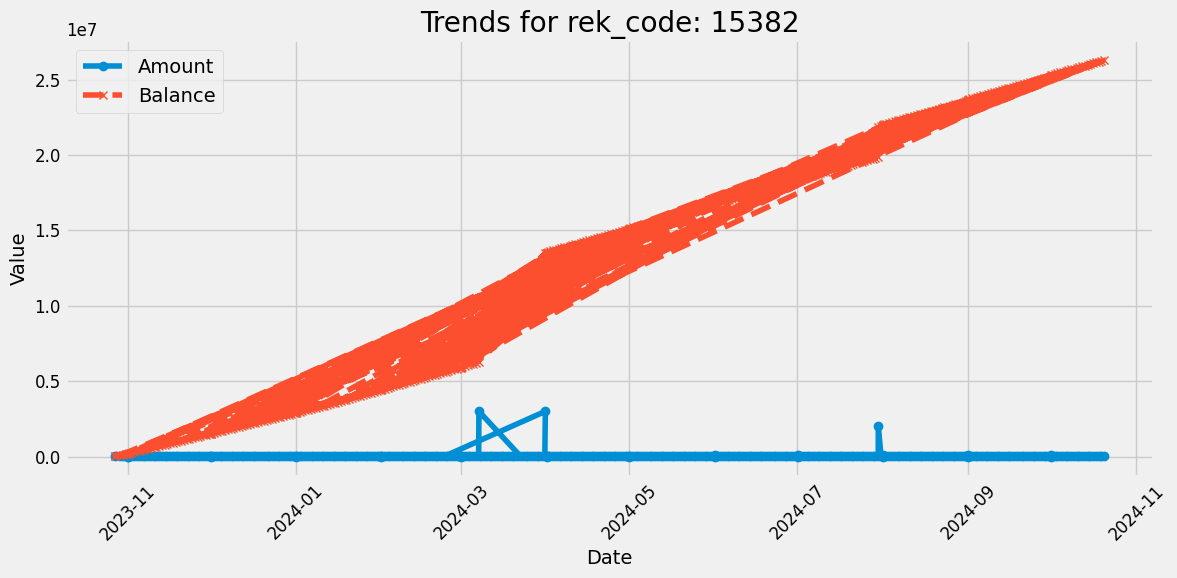

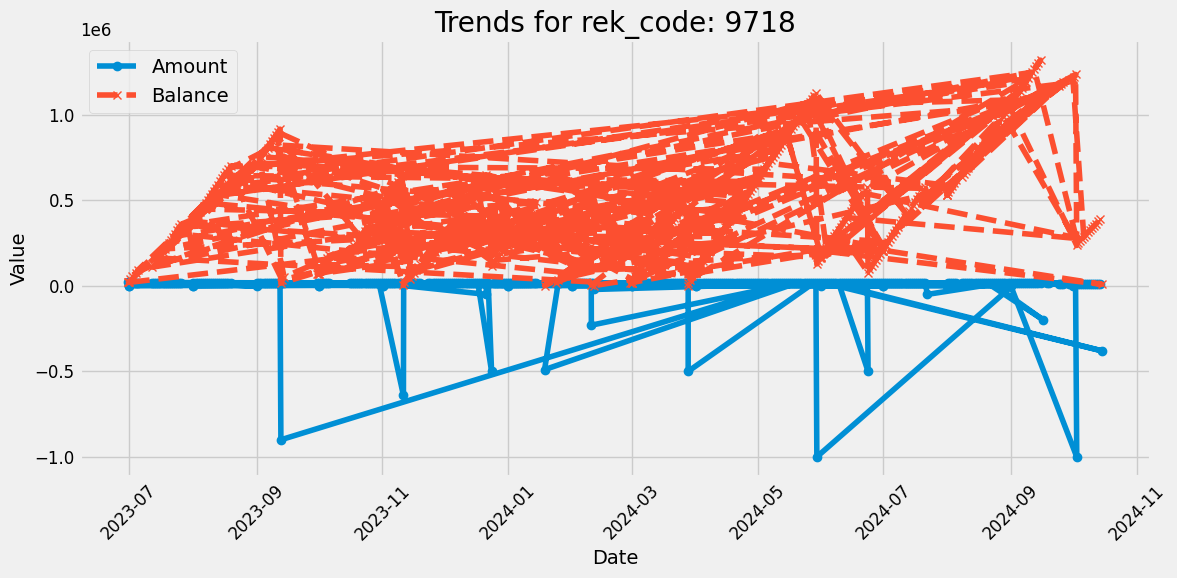

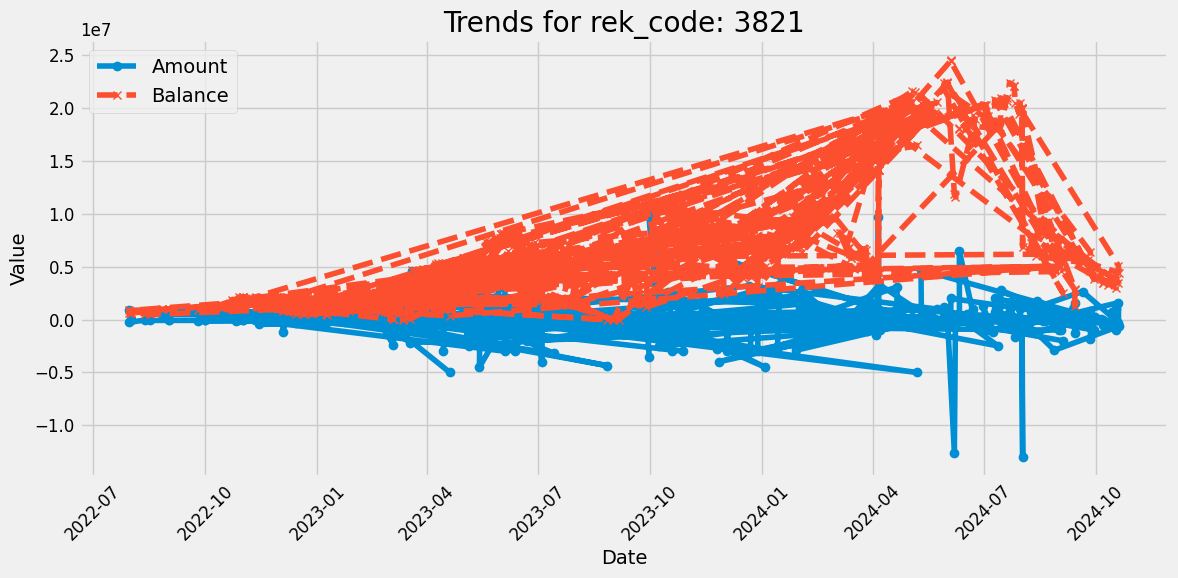

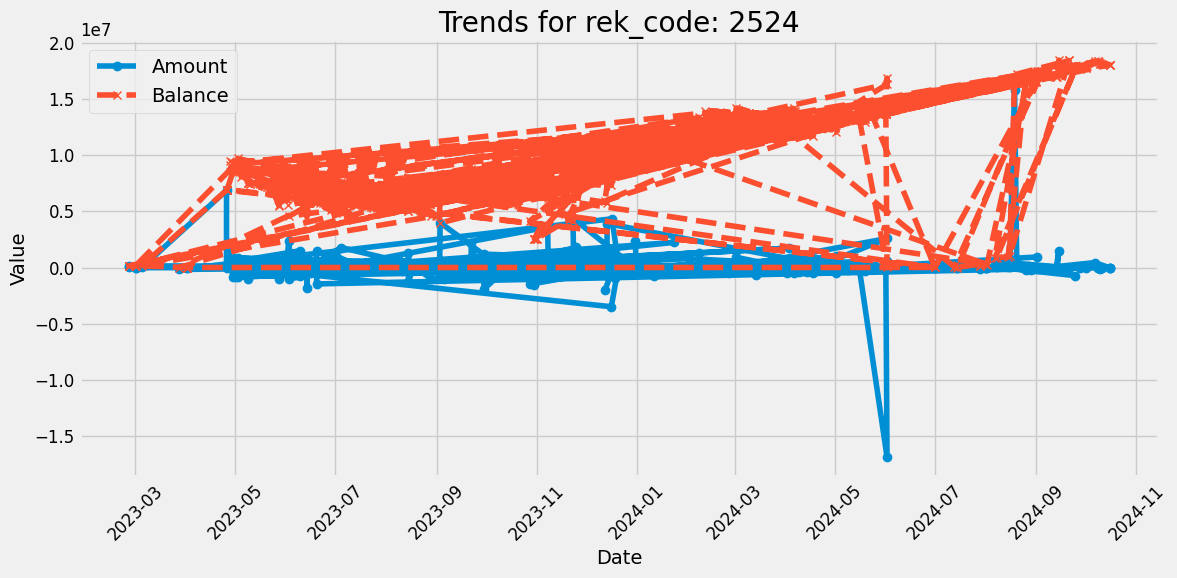

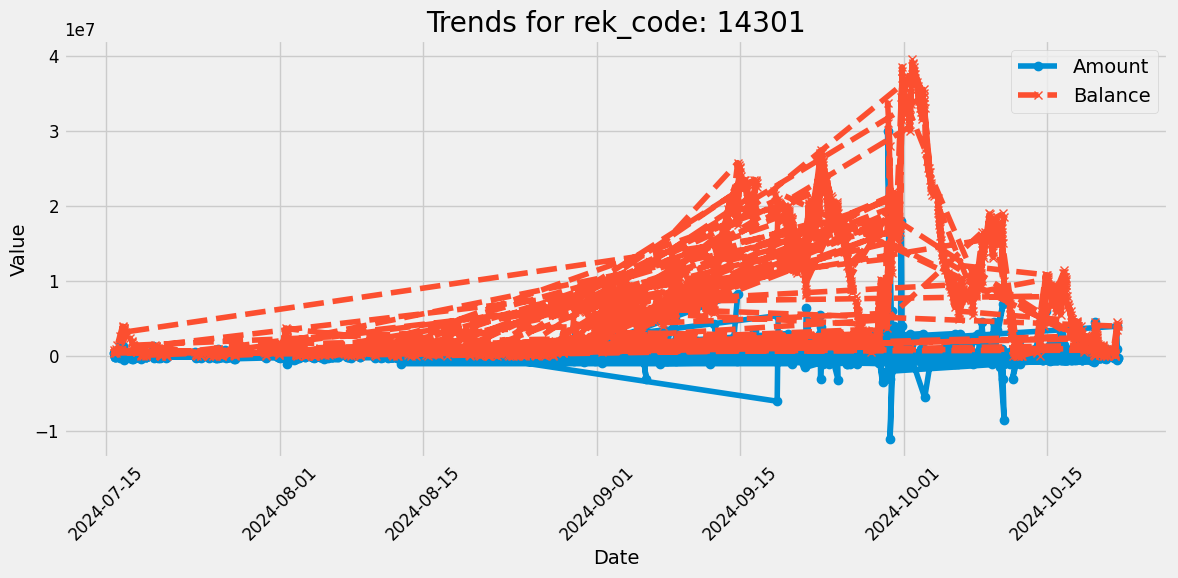

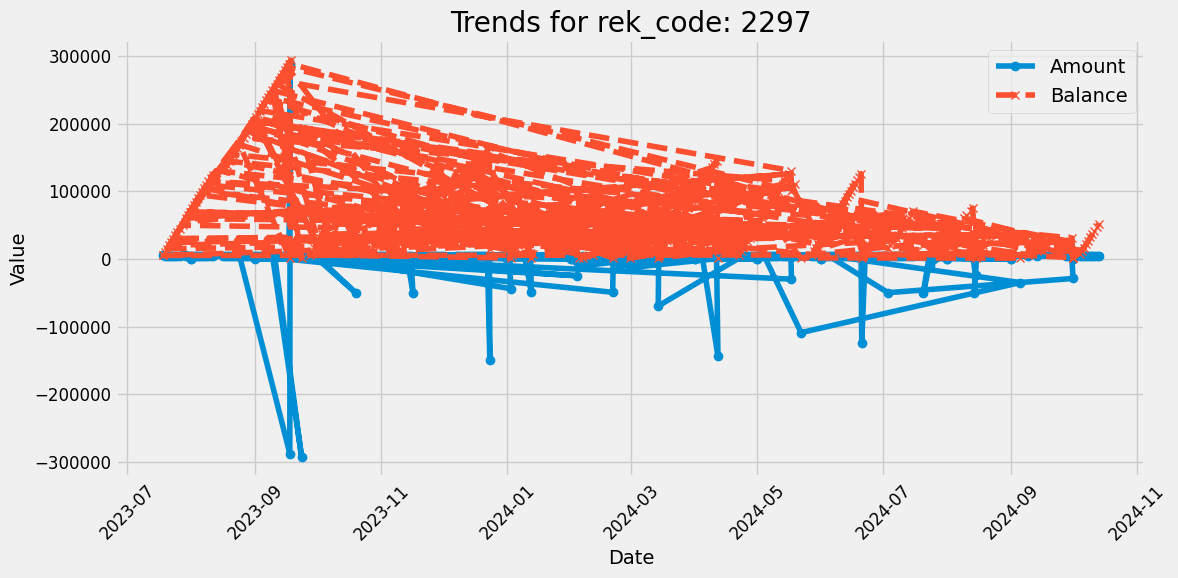

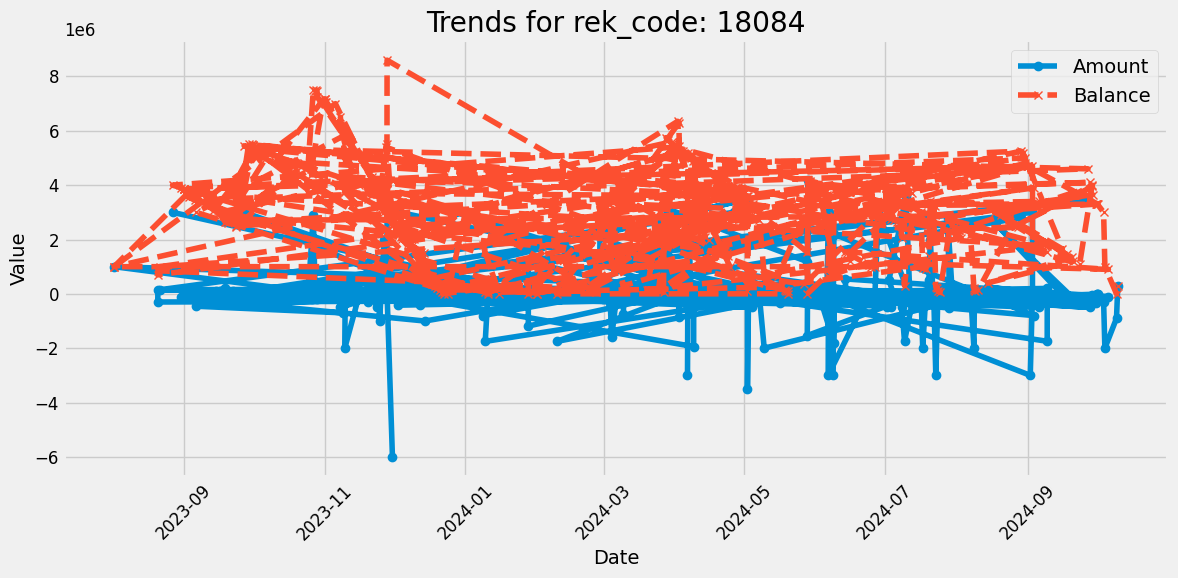

In [ ]:
for rek in dfTrain_sorted['rek_code'].unique():
    rek_data = dfTrain_sorted[dfTrain_sorted['rek_code'] == rek].copy() # Create a copy to avoid SettingWithCopyWarning
    rek_data['creationdate'] = pd.to_datetime(rek_data['creationdate'])
    rek_data = rek_data.set_index('creationdate') # Set creationdate as index

    plt.figure(figsize=(12, 6))
    plt.title(f'Trends for rek_code: {rek}')

    plt.plot(rek_data['amount'], label='Amount', marker='o', linestyle='-') # plot amount
    plt.plot(rek_data['balance'], label='Balance', marker='x', linestyle='--') # plot balance
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Membuat Model

In [ ]:
!pip install darts
from darts import TimeSeries

In [ ]:
# Memisahkan menjadi training 80% dan test 20%
split_point = int(len(daily_aggregations) * 0.8)

training_data = daily_aggregations[:split_point]
testing_data = daily_aggregations[split_point:]

print("Training data:")
print(training_data.head())
print("\nTesting data:")
print(testing_data.head())

Training data:
                           daily_transaction_count  daily_total_amount  daily_average_balance
creationdate                                                                                 
2022-01-26 15:41:53+07:00                        1            425600.0              425600.00
2022-01-28 11:06:56+07:00                        1            200000.0              200000.00
2022-01-29 14:03:57+07:00                        1           -425600.0                   0.00
2022-02-01 00:15:31+07:00                        6                96.4              100036.15
2022-02-02 09:02:24+07:00                        1            850000.0              850059.26

Testing data:
                           daily_transaction_count  daily_total_amount  daily_average_balance
creationdate                                                                                 
2024-08-18 11:56:31+07:00                        1           -500000.0             2185847.11
2024-08-18 12:13:44+07:00     

RMSE: 1217638.0253557654


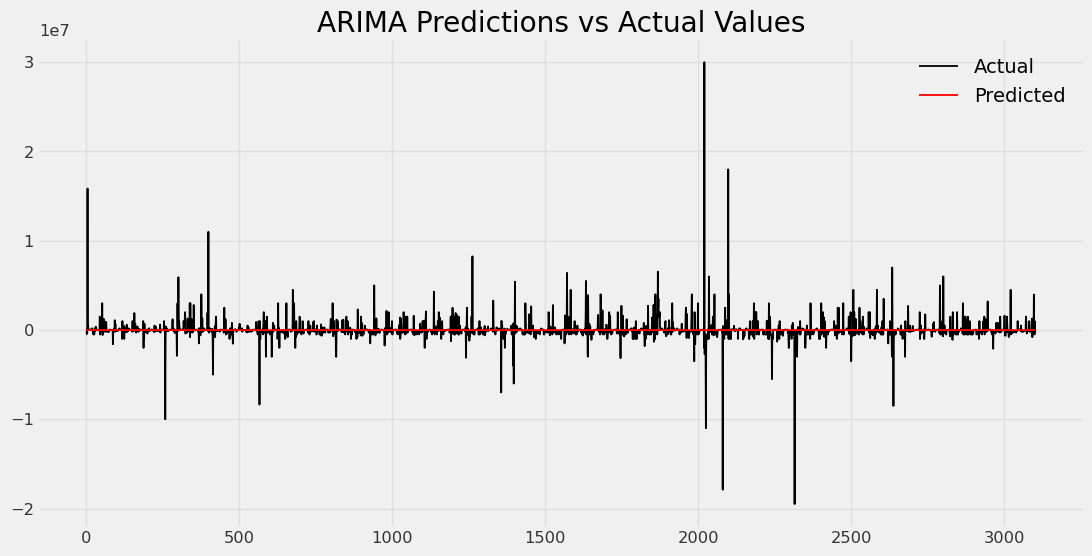

Random Forest RMSE: 1349448.5154836285


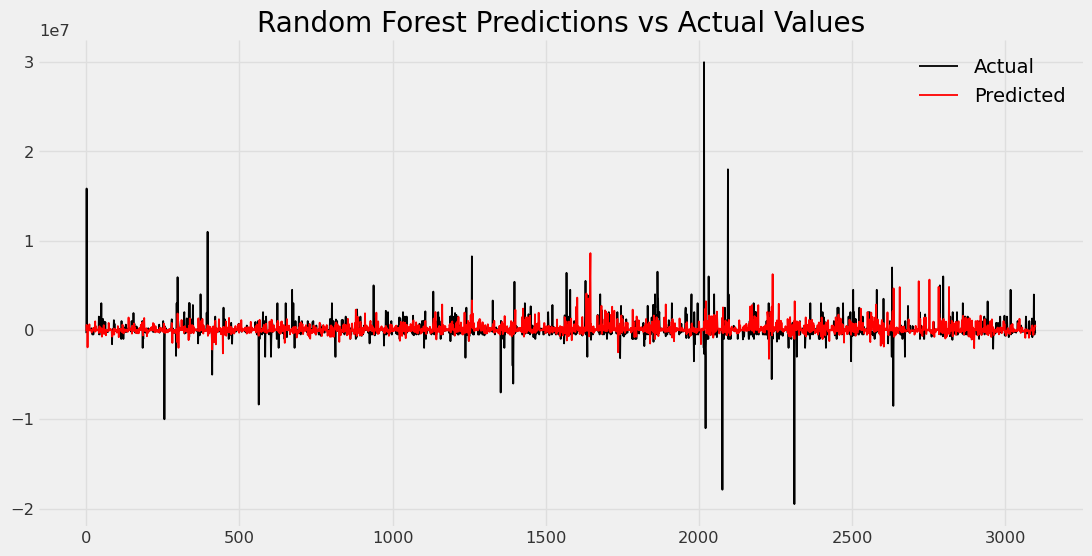

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Gunakan ARIMA
train_data = training_data['daily_total_amount'].values
test_data = testing_data['daily_total_amount'].values

# ARIMA model
model = ARIMA(train_data, order=(5,1,0)) # (p, d, q) -  you'll likely need to find optimal parameters
model_fit = model.fit()

# Membuat prediksi
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse}")

# Plot ARIMA
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.title("ARIMA Predictions vs Actual Values")
plt.show()


from sklearn.ensemble import RandomForestRegressor

for i in range(1, 4):  # Example: Lags of 1, 2, and 3 days
    training_data[f'lag_{i}'] = training_data['daily_total_amount'].shift(i)
    testing_data[f'lag_{i}'] = testing_data['daily_total_amount'].shift(i)

# Drop rows with NaN values created by shifting
training_data.dropna(inplace=True)
testing_data.dropna(inplace=True)


# Random Forest
X_train = training_data.drop('daily_total_amount', axis=1)
y_train = training_data['daily_total_amount']
X_test = testing_data.drop('daily_total_amount', axis=1)
y_test = testing_data['daily_total_amount']

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Example parameters
rf_model.fit(X_train, y_train)


# Make predictions
rf_predictions = rf_model.predict(X_test)


rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")

# Plot Random Forest
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label='Predicted', color='red')
plt.legend()
plt.title("Random Forest Predictions vs Actual Values")
plt.show()

## Menghitung Akurasi Model Menggunakan SMAPE

In [ ]:
# SMAPE
def smape(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    denominator = (np.abs(actual) + np.abs(predicted)) / 2.0
    smape_value = np.mean(2.0 * np.abs(actual - predicted) / denominator) * 100
    return smape_value

In [ ]:
# SMAPE for ARIMA
arima_smape = smape(test_data, predictions)
print(f"ARIMA SMAPE: {arima_smape:.2f}%")

# SMAPE for Random Forest
rf_smape = smape(y_test, rf_predictions)
print(f"Random Forest SMAPE: {rf_smape:.2f}%")


ARIMA SMAPE: 350.61%
Random Forest SMAPE: 290.45%


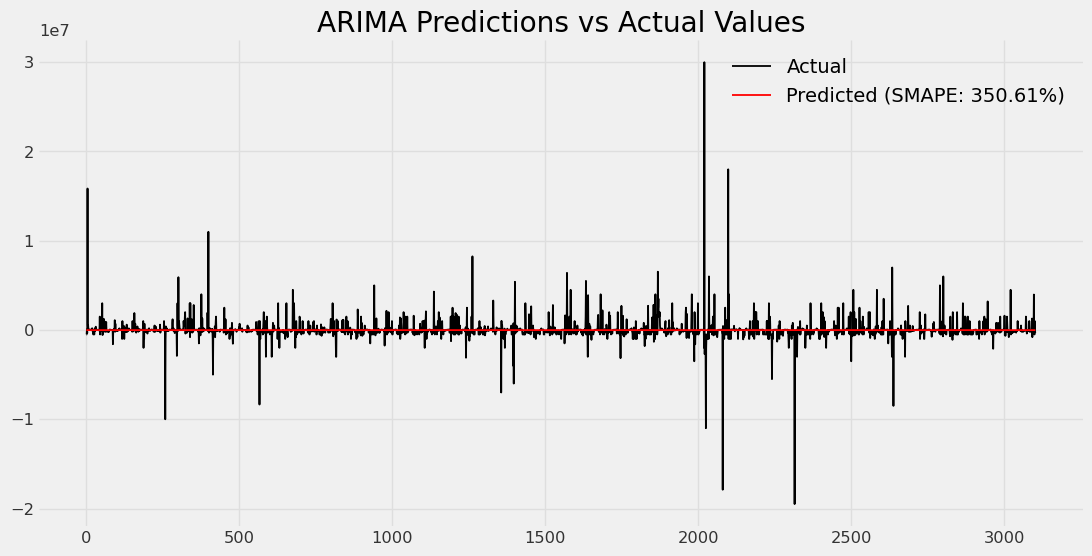

In [ ]:
# Plot ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(predictions, label=f'Predicted (SMAPE: {arima_smape:.2f}%)', color='red')
plt.legend()
plt.title("ARIMA Predictions vs Actual Values")
plt.show()

# Plot Random Forest
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label=f'Predicted (SMAPE: {rf_smape:.2f}%)', color='red')
plt.legend()
plt.title("Random Forest Predictions vs Actual Values")
plt.show()


In [ ]:
dfTrain_grouped = dfTrain_sorted.groupby('rek_code').agg({'amount': 'sum', 'balance': 'last'})
balance_mapping = dfTrain_grouped['balance'].to_dict()
dfTest['balance'] = dfTest['rek_code'].map(balance_mapping)
dfTest

trx_code     trx_id  rek_code    rek              creationdate  type      balance
0     233822  371848437      1922   2526 2024-10-21 20:02:14+07:00   NaN   1305063.62
1     281563  370918907      2346   9437 2024-10-17 08:23:41+07:00   NaN    251219.17
2     310541  370287760      2212   5908 2024-10-14 07:44:47+07:00   NaN    101023.37
3      37018  370872355      3799   7665 2024-10-16 23:04:24+07:00   NaN    171557.59
4     142422  362772092      7868    825 2024-10-01 00:13:21+07:00   NaN      4678.21
5     128215  312221200     11465   7639 2024-06-06 18:51:53+07:00   NaN  23308047.50
6     576302  362740207      2604  13082 2024-10-01 00:11:37+07:00   NaN      5781.77
7     316534  371805906     14602  13945 2024-10-21 16:39:36+07:00   NaN   6697072.06
8     435860  370502689      5614   1207 2024-10-15 09:21:01+07:00   NaN  21088209.38
9     355943  367221236     10641   8538 2024-10-01 17:24:45+07:00   NaN    506038.62
10    505898  371528573      2623   6240 2024-10-20 07:09:48+07:00   NaN   1798246.01
11    460774  371710495      1035   6672 2024-10-21 07:07:41+07:00   NaN     79150.37
12     34251  370484455      3533   6228 2024-10-15 07:07:53+07:00   NaN    737156.39
13    508484  371710644     13507   9175 2024-10-21 07:07:52+07:00   NaN    695962.51
14    505934  371734141      2979   8562 2024-10-21 10:02:26+07:00   NaN   2344316.43
15    507070  371504187     20365  11071 2024-10-19 22:58:46+07:00   NaN    188446.44
16    109389  371710529      6719   2109 2024-10-21 07:07:43+07:00   NaN   5586123.59
17     37163  371711721       515    541 2024-10-21 07:09:25+07:00   NaN   5030903.90
18    233807  371711224      6583  15414 2024-10-21 07:08:41+07:00   NaN    430858.11
19    525412  371365612       893  15169 2024-10-19 10:53:28+07:00   NaN   1082446.94
20    440300  371710280      4090  11745 2024-10-21 07:07:21+07:00   NaN     35067.49
21    460781  371711703     12429  10694 2024-10-21 07:09:24+07:00   NaN   7426926.36
22    193677  371865019     15927  11920 2024-10-21 21:30:29+07:00   NaN   2108623.74
23    577720  370985378     19084  15442 2024-10-17 14:44:55+07:00   NaN  55181758.78
24    505928  371710582     19108  11284 2024-10-21 07:07:47+07:00   NaN   3170358.16
25    331565  371711478     15382   2864 2024-10-21 07:09:03+07:00   NaN  26096475.51
26    315819  371710713      9718  10957 2024-10-21 07:07:58+07:00   NaN    389053.90
27    284605  371435417      3821  15923 2024-10-19 17:02:47+07:00   NaN   3992608.55
28    109370  371607910      2524   9210 2024-10-20 15:56:27+07:00   NaN  18131524.62
29    525511  371880587     14301   2673 2024-10-21 23:47:37+07:00   NaN   5900000.00
30     39817  371449898      1688   7977 2024-10-19 18:11:17+07:00   NaN      1259.63
31    304728  370592988     19034   7354 2024-10-15 17:10:32+07:00   NaN     51544.18
32     39671  370592943      2297   7638 2024-10-15 17:10:19+07:00   NaN     51519.24
33    505930  371711098     11213   1734 2024-10-21 07:08:31+07:00   NaN      1253.35
34    290007  369802962     18084   6376 2024-10-11 19:35:40+07:00   NaN    301001.18

In [ ]:
# Visualisasi distribusi 'balance' di dfTest
plt.figure(figsize=(8, 6))
sns.histplot(dfTest['balance'], kde=True)
plt.title('Distribusi Balance di dfTest')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Scatter plot 'amount' vs 'balance' di dfTest (jika ada kolom 'amount')
if 'amount' in dfTest.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='amount', y='balance', data=dfTest)
    plt.title('Scatter Plot Amount vs Balance di dfTest')
    plt.xlabel('Amount')
    plt.ylabel('Balance')
    plt.show()

# Box plot 'balance' berdasarkan 'rek_code' di dfTest
plt.figure(figsize=(10, 6))
sns.boxplot(x='rek', y='balance', data=dfTest)
plt.title('Box Plot Balance berdasarkan rek_code di dfTest')
plt.xlabel('rek')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from darts.metrics import smape
from darts import TimeSeries

gt = TimeSeries.from_values(dfTrain['balance'])
pred = TimeSeries.from_values(dfTest['balance'])

skor = smape(gt,pred)
print("Nilai SMAPE = ", skor)

Nilai SMAPE =  143.200116158514
